# Capstone Project on Investigation of Road Accident

In [1]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#libraries required for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

#Libraries required for SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn import model_selection, naive_bayes, svm, metrics, feature_extraction

#Libraries required for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
#Loading the dataset

df = pd.read_csv("C:/Users/dell/Downloads/ipynb datasets/Data_Collisions.csv")

In [3]:
#Data description

df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [4]:
#randomly selects 20,000 rows from the DataFrame df and assigns the resulting subset to a new DataFrame called data
data = df.sample(20000)

In [5]:
#Data description

data

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
164826,1,-122.327222,47.620829,183823,240668,241108,E658019,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,N
181301,1,-122.322276,47.679518,203754,329083,330583,EA15490,Unmatched,Block,NaN,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
75650,2,-122.338701,47.610743,82565,97847,97847,3283020,Matched,Intersection,29580.0,...,Wet,Daylight,NaN,9348036.0,NaN,3,Vehicle backing hits pedestrian,0,521575,N
184233,1,-122.340131,47.517273,207182,301884,303104,3742521,Matched,Intersection,34984.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
152771,1,NaN,NaN,170179,213580,213840,3580725,Matched,Block,NaN,...,Wet,Dark - No Street Lights,NaN,NaN,NaN,50,Fixed object,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157220,1,-122.348273,47.618574,175360,227005,227345,E583848,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,71,Same direction -- both turning right -- both m...,0,0,N
155372,1,-122.357660,47.653557,173216,219037,219337,3737643,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,N
114943,2,-122.296432,47.675778,127264,142786,142786,3508069,Matched,Intersection,24699.0,...,Dry,Daylight,NaN,13025009.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
73750,1,-122.347315,47.652060,80429,97068,97068,C717231,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,9040038.0,NaN,11,From same direction - both going straight - bo...,0,0,N


# Data Exploration

In [6]:
#Information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 164826 to 182845
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEVERITYCODE    20000 non-null  int64  
 1   X               19438 non-null  float64
 2   Y               19438 non-null  float64
 3   OBJECTID        20000 non-null  int64  
 4   INCKEY          20000 non-null  int64  
 5   COLDETKEY       20000 non-null  int64  
 6   REPORTNO        20000 non-null  object 
 7   STATUS          20000 non-null  object 
 8   ADDRTYPE        19813 non-null  object 
 9   INTKEY          6724 non-null   float64
 10  LOCATION        19728 non-null  object 
 11  EXCEPTRSNCODE   8739 non-null   object 
 12  EXCEPTRSNDESC   564 non-null    object 
 13  SEVERITYCODE.1  20000 non-null  int64  
 14  SEVERITYDESC    20000 non-null  object 
 15  COLLISIONTYPE   19473 non-null  object 
 16  PERSONCOUNT     20000 non-null  int64  
 17  PEDCOUNT        20000 non-null

In [7]:
#Statistical information of the data
data.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,20000.000000,19438.000000,19438.000000,20000.000000,20000.000000,20000.000000,6724.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1.179600e+04,20000.000000,20000.000000
mean,1.301100,-122.330582,47.619076,108642.543900,141040.045500,141246.327050,38167.695568,1.301100,2.439750,0.036500,0.028950,1.918450,13.875250,7.954577e+06,298.771800,10075.791250
std,0.458748,0.029987,0.056385,62640.514289,86542.029957,86891.828407,53426.983104,0.458748,1.342855,0.195371,0.168859,0.643522,6.894945,2.558349e+06,4553.125995,72443.186717
min,1.000000,-122.419091,47.495807,10.000000,1001.000000,1001.000000,23814.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.001005e+06,0.000000,0.000000
25%,1.000000,-122.348645,47.574567,54168.750000,70383.500000,70383.500000,28740.750000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.032776e+06,0.000000,0.000000
50%,1.000000,-122.330574,47.615247,107543.500000,123682.500000,123682.500000,30071.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.015014e+06,0.000000,0.000000
75%,2.000000,-122.311952,47.663938,162567.000000,203476.000000,203616.000000,34031.750000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015502e+07,0.000000,0.000000
max,2.000000,-122.238949,47.734142,219543.000000,331453.000000,332953.000000,757580.000000,2.000000,54.000000,4.000000,2.000000,11.000000,69.000000,1.307002e+07,525169.000000,699687.000000


In [8]:
#Shape of the dataset
data.shape

(20000, 38)

In [9]:
#Top 5 rows
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
164826,1,-122.327222,47.620829,183823,240668,241108,E658019,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,N
181301,1,-122.322276,47.679518,203754,329083,330583,EA15490,Unmatched,Block,NaN,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
75650,2,-122.338701,47.610743,82565,97847,97847,3283020,Matched,Intersection,29580.0,...,Wet,Daylight,NaN,9348036.0,NaN,3,Vehicle backing hits pedestrian,0,521575,N
184233,1,-122.340131,47.517273,207182,301884,303104,3742521,Matched,Intersection,34984.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
152771,1,NaN,NaN,170179,213580,213840,3580725,Matched,Block,NaN,...,Wet,Dark - No Street Lights,NaN,NaN,NaN,50,Fixed object,0,0,N


In [10]:
#Bottom 3 rows
data.tail(3)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
114943,2,-122.296432,47.675778,127264,142786,142786,3508069,Matched,Intersection,24699.0,...,Dry,Daylight,NaN,13025009.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
73750,1,-122.347315,47.652060,80429,97068,97068,C717231,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,9040038.0,NaN,11,From same direction - both going straight - bo...,0,0,N
182845,2,-122.311530,47.595874,205534,328355,329855,EA08704,Matched,Intersection,30781.0,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,1,Vehicle turning right hits pedestrian,0,525035,N


In [11]:
#no. of unique rows in each column
data.nunique()

SEVERITYCODE          2
X                  9179
Y                  9245
OBJECTID          20000
INCKEY            20000
COLDETKEY         20000
REPORTNO          19999
STATUS                2
ADDRTYPE              3
INTKEY             3013
LOCATION           9330
EXCEPTRSNCODE         2
EXCEPTRSNDESC         1
SEVERITYCODE.1        2
SEVERITYDESC          2
COLLISIONTYPE        10
PERSONCOUNT          25
PEDCOUNT              5
PEDCYLCOUNT           3
VEHCOUNT             11
INCDATE            5654
INCDTTM           17843
JUNCTIONTYPE          6
SDOT_COLCODE         31
SDOT_COLDESC         31
INATTENTIONIND        1
UNDERINFL             4
WEATHER              11
ROADCOND              9
LIGHTCOND             8
PEDROWNOTGRNT         1
SDOTCOLNUM        11795
SPEEDING              1
ST_COLCODE          102
ST_COLDESC           57
SEGLANEKEY          280
CROSSWALKKEY        374
HITPARKEDCAR          2
dtype: int64

In [12]:
#Number of columns
data.nunique().count()

38

In [13]:
#No. of missing rows in each column
data.isnull().sum()

SEVERITYCODE          0
X                   562
Y                   562
OBJECTID              0
INCKEY                0
COLDETKEY             0
REPORTNO              0
STATUS                0
ADDRTYPE            187
INTKEY            13276
LOCATION            272
EXCEPTRSNCODE     11261
EXCEPTRSNDESC     19436
SEVERITYCODE.1        0
SEVERITYDESC          0
COLLISIONTYPE       527
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDATE               0
INCDTTM               0
JUNCTIONTYPE        646
SDOT_COLCODE          0
SDOT_COLDESC          0
INATTENTIONIND    16972
UNDERINFL           526
WEATHER             546
ROADCOND            542
LIGHTCOND           560
PEDROWNOTGRNT     19498
SDOTCOLNUM         8204
SPEEDING          19026
ST_COLCODE            1
ST_COLDESC          527
SEGLANEKEY            0
CROSSWALKKEY          0
HITPARKEDCAR          0
dtype: int64

In [14]:
#percentage of missing values in each row
(data.isnull().sum()/(len(data)))*100                 

SEVERITYCODE       0.000
X                  2.810
Y                  2.810
OBJECTID           0.000
INCKEY             0.000
COLDETKEY          0.000
REPORTNO           0.000
STATUS             0.000
ADDRTYPE           0.935
INTKEY            66.380
LOCATION           1.360
EXCEPTRSNCODE     56.305
EXCEPTRSNDESC     97.180
SEVERITYCODE.1     0.000
SEVERITYDESC       0.000
COLLISIONTYPE      2.635
PERSONCOUNT        0.000
PEDCOUNT           0.000
PEDCYLCOUNT        0.000
VEHCOUNT           0.000
INCDATE            0.000
INCDTTM            0.000
JUNCTIONTYPE       3.230
SDOT_COLCODE       0.000
SDOT_COLDESC       0.000
INATTENTIONIND    84.860
UNDERINFL          2.630
WEATHER            2.730
ROADCOND           2.710
LIGHTCOND          2.800
PEDROWNOTGRNT     97.490
SDOTCOLNUM        41.020
SPEEDING          95.130
ST_COLCODE         0.005
ST_COLDESC         2.635
SEGLANEKEY         0.000
CROSSWALKKEY       0.000
HITPARKEDCAR       0.000
dtype: float64

In [15]:
#Data type of each column
data.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

# Data Cleaning

<Axes: >

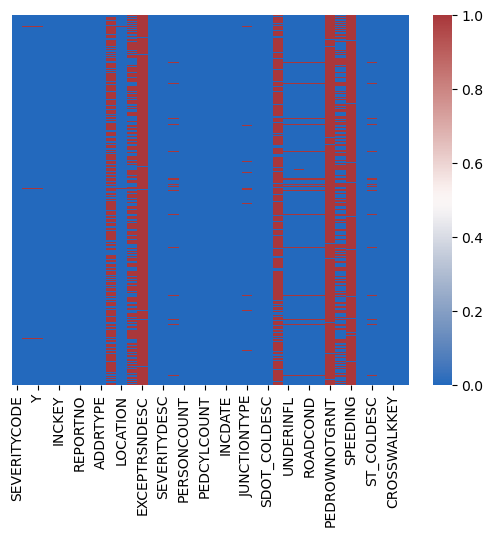

In [16]:
#Visualizing the null values
sns.heatmap(data.isnull(), yticklabels=False, cmap="vlag")

In [17]:
#Removing the unwanted columns, by selecting only useful columns
data= data[['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','VEHCOUNT','INCDATE','JUNCTIONTYPE','WEATHER'
       ,'ROADCOND','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL']]

In [18]:
#No. of columns have been reduced
data.shape

(20000, 14)

In [19]:
#No. of missing rows in each column
data.isnull().sum()

SEVERITYCODE          0
ADDRTYPE            187
COLLISIONTYPE       527
PERSONCOUNT           0
PEDCOUNT              0
VEHCOUNT              0
INCDATE               0
JUNCTIONTYPE        646
WEATHER             546
ROADCOND            542
LIGHTCOND           560
SPEEDING          19026
INATTENTIONIND    16972
UNDERINFL           526
dtype: int64

<Axes: >

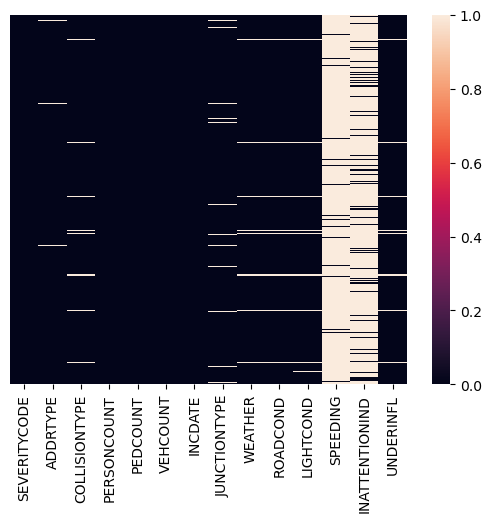

In [20]:
#Visualizing the null values
sns.heatmap(data.isnull(), yticklabels=False, cmap='rocket')

In [21]:
print('Unique Values of SPEEDING: ',data.SPEEDING.unique(),'\n\n')
print('Unique Values of UNDERINFL: ',data.UNDERINFL.unique(),'\n\n')
print('Unique Values of INATTENTIONIND: ',data.INATTENTIONIND.unique())

Unique Values of SPEEDING:  [nan 'Y'] 


Unique Values of UNDERINFL:  ['N' nan '0' 'Y' '1'] 


Unique Values of INATTENTIONIND:  [nan 'Y']


In [22]:
#Replacing Y with 1 and N with 0 in SPEEDING, INATTENTIONIND, UNDERINFL columns
data.SPEEDING.fillna(value=0,axis=0,inplace=True)
data.SPEEDING.replace(to_replace='Y',value=1,inplace=True)

data.INATTENTIONIND.fillna(value=0,axis=0,inplace=True)
data.INATTENTIONIND.replace(to_replace='Y',value=1,inplace=True)

data.UNDERINFL.replace(to_replace=('Y','N','1','0'),value=(1,0,1,0),inplace=True)

print('SPEEDING unique values: ',data.SPEEDING.unique(),'\n\n')
print('INATTENTIONIND unique values: ',data.INATTENTIONIND.unique(),'\n\n')
print('UNDERINFL unique values:',data.UNDERINFL.unique())

SPEEDING unique values:  [0 1] 


INATTENTIONIND unique values:  [0 1] 


UNDERINFL unique values: [ 0. nan  1.]


In [23]:
data.isnull().sum()

SEVERITYCODE        0
ADDRTYPE          187
COLLISIONTYPE     527
PERSONCOUNT         0
PEDCOUNT            0
VEHCOUNT            0
INCDATE             0
JUNCTIONTYPE      646
WEATHER           546
ROADCOND          542
LIGHTCOND         560
SPEEDING            0
INATTENTIONIND      0
UNDERINFL         526
dtype: int64

In [24]:
print('Unique vaues for ADDRTYPE:','\n',data['ADDRTYPE'].unique(),'\n\n\n')
print('Unique vaues for COLLISIONTYPE:','\n',data['COLLISIONTYPE'].unique(),'\n\n\n')
print('Unique vaues for JUNCTIONTYPE:','\n',data['JUNCTIONTYPE'].unique(),'\n\n\n')
print('Unique vaues for WEATHER:','\n',data['WEATHER'].unique(),'\n\n\n')
print('Unique vaues for ROADCOND:','\n',data['ROADCOND'].unique(),'\n\n\n')
print('Unique vaues for LIGHTCOND:','\n',data['LIGHTCOND'].unique(),'\n\n\n')

Unique vaues for ADDRTYPE: 
 ['Block' 'Intersection' 'Alley' nan] 



Unique vaues for COLLISIONTYPE: 
 ['Parked Car' nan 'Pedestrian' 'Left Turn' 'Other' 'Rear Ended' 'Cycles'
 'Angles' 'Sideswipe' 'Right Turn' 'Head On'] 



Unique vaues for JUNCTIONTYPE: 
 ['Mid-Block (not related to intersection)'
 'At Intersection (intersection related)'
 'Mid-Block (but intersection related)' 'Driveway Junction' nan
 'At Intersection (but not related to intersection)' 'Ramp Junction'] 



Unique vaues for WEATHER: 
 ['Raining' nan 'Clear' 'Unknown' 'Overcast' 'Fog/Smog/Smoke' 'Snowing'
 'Other' 'Sleet/Hail/Freezing Rain' 'Severe Crosswind' 'Blowing Sand/Dirt'
 'Partly Cloudy'] 



Unique vaues for ROADCOND: 
 ['Wet' nan 'Dry' 'Unknown' 'Ice' 'Sand/Mud/Dirt' 'Oil' 'Snow/Slush'
 'Standing Water' 'Other'] 



Unique vaues for LIGHTCOND: 
 ['Daylight' nan 'Dark - No Street Lights' 'Dark - Street Lights On'
 'Unknown' 'Dawn' 'Dark - Street Lights Off' 'Dusk' 'Other'] 





We now see that the rest of the categorical data have multiple entries in each column so mapping them to numeric values is not useful at this point

In [25]:
#Handling null values

#Filling the missing values using bfill and ffill method
data['ADDRTYPE'].fillna(method='bfill' , inplace=True)
data['COLLISIONTYPE'].fillna(method='ffill' , inplace=True)
data['JUNCTIONTYPE'].fillna(method='bfill' , inplace=True)
data['WEATHER'].fillna(method='ffill' , inplace=True)
data['ROADCOND'].fillna(method='bfill' , inplace=True)
data['LIGHTCOND'].fillna(method='ffill' , inplace=True)

<Axes: >

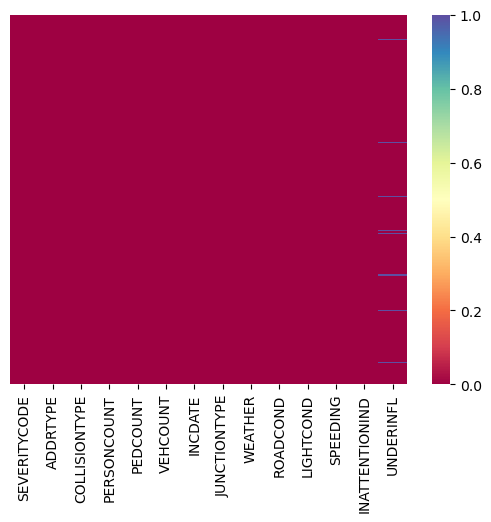

In [26]:
#Visualizing null values
sns.heatmap(data.isnull(), yticklabels=False, cmap="Spectral")

In [27]:
#Filling the missing values in UNDERINFL column by median method
data['UNDERINFL'].fillna(data['UNDERINFL'].median(), inplace=True)

<Axes: >

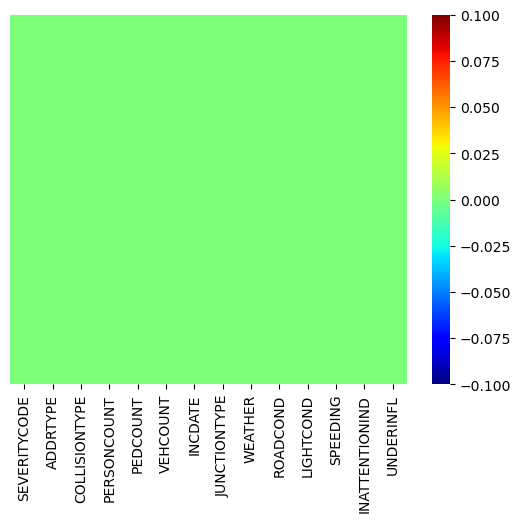

In [28]:
#Visualizing null values
sns.heatmap(data.isnull(), yticklabels=False, cmap='jet')

In [29]:
#No. of null values in each column
data.isnull().sum()

SEVERITYCODE      0
ADDRTYPE          0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
VEHCOUNT          0
INCDATE           0
JUNCTIONTYPE      0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
INATTENTIONIND    0
UNDERINFL         0
dtype: int64

Now as we can see their is no missing value in the data, means the data is cleaned and we can work on it.

In [30]:
#Cleaning Dates

data['INCDATE'] = pd.to_datetime(data['INCDATE'], format='%Y/%m/%d %H:%M:%S+00')
data['YEAR'] = data['INCDATE'].dt.year
data['MONTH'] = data['INCDATE'].dt.month
data['DAY'] = data['INCDATE'].dt.weekday

data.drop(labels='INCDATE', axis=1, inplace=True)
data.drop(labels='JUNCTIONTYPE', axis=1, inplace=True)

data.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,YEAR,MONTH,DAY
164826,1,Block,Parked Car,0,0,4,Raining,Wet,Daylight,0,0,0.0,2017,3,6
181301,1,Block,Parked Car,3,0,0,Raining,Wet,Daylight,0,0,0.0,2020,2,0
75650,2,Intersection,Pedestrian,3,1,1,Raining,Wet,Daylight,0,0,0.0,2009,12,0
184233,1,Intersection,Left Turn,2,0,2,Clear,Dry,Daylight,0,0,0.0,2018,8,0
152771,1,Block,Other,1,0,1,Raining,Wet,Dark - No Street Lights,0,0,1.0,2016,2,6


# Data Visualization

In [31]:
a = data.groupby('WEATHER')['WEATHER'].count()

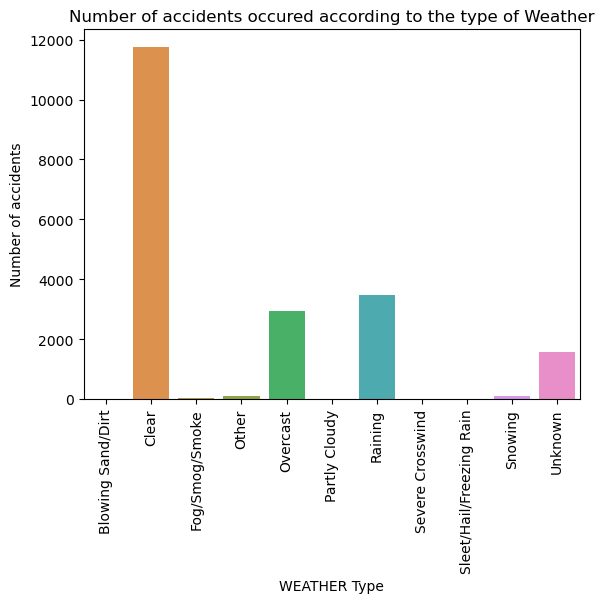

In [32]:
#Number of accidents according to WEATHER
sns.barplot(x=a.index, y=a.values)

plt.title('Number of accidents occured according to the type of Weather')
plt.xlabel('WEATHER Type')
plt.ylabel('Number of accidents')
plt.xticks(rotation=90)

plt.show()

In [33]:
b = data.groupby('ROADCOND')['ROADCOND'].count()

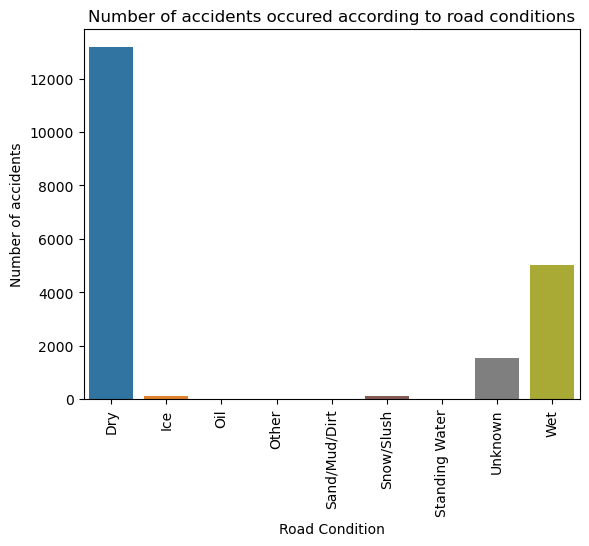

In [34]:
#Number of accidents according to Road Condition
sns.barplot(x=b.index, y=b.values)

plt.title('Number of accidents occured according to road conditions')
plt.xlabel('Road Condition')
plt.ylabel('Number of accidents')
plt.xticks(rotation=90)

plt.show()

In [35]:
c = data.groupby('LIGHTCOND')['LIGHTCOND'].count()

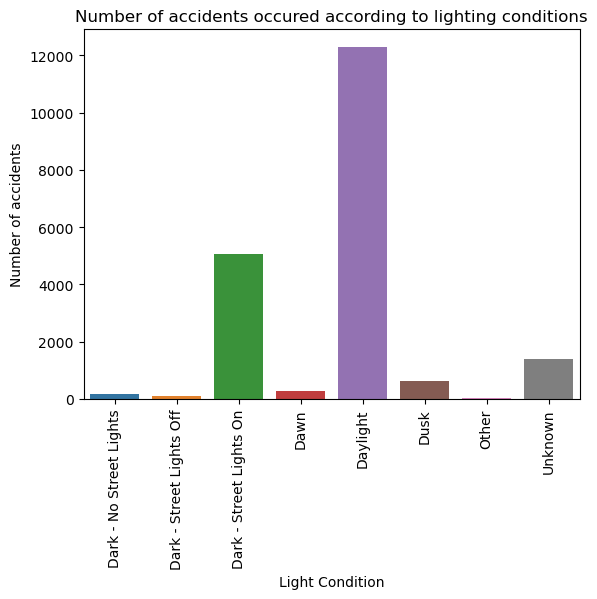

In [36]:
#Number of accidents according to Light Condition
sns.barplot(x=c.index, y=c.values)
plt.title('Number of accidents occured according to lighting conditions')
plt.xlabel('Light Condition')
plt.ylabel('Number of accidents')
plt.xticks(rotation=90)
plt.show()

In [37]:
d = data.groupby('ADDRTYPE')['ADDRTYPE'].count()

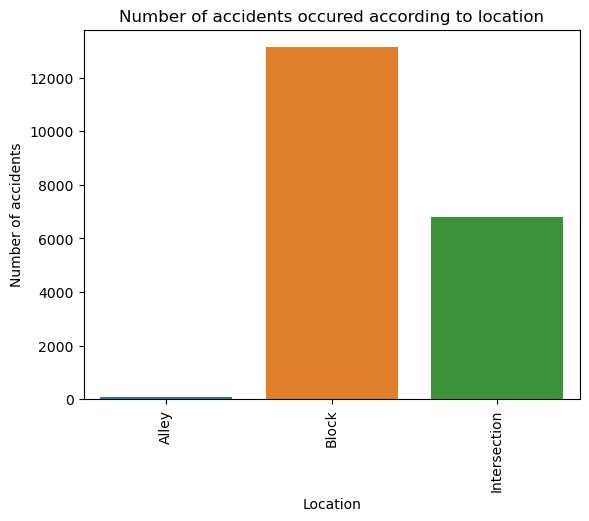

In [38]:
#Number of accidents according to Location
sns.barplot(x=d.index, y=d.values)
plt.title('Number of accidents occured according to location')
plt.xlabel('Location')
plt.ylabel('Number of accidents')
plt.xticks(rotation=90)
plt.show()

In [39]:
e = data.groupby('UNDERINFL')['UNDERINFL'].count()

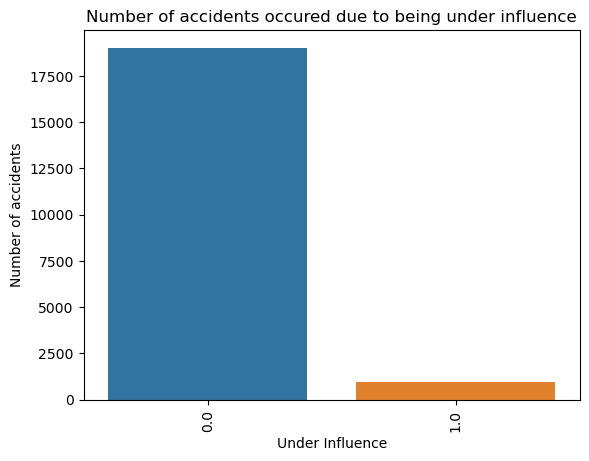

In [40]:
#Number of accidents according to Driving under influence
sns.barplot(x=e.index, y=e.values)
plt.title('Number of accidents occured due to being under influence')
plt.xlabel('Under Influence')
plt.ylabel('Number of accidents')
plt.xticks(rotation=90)
plt.show()

In [41]:
f = data.groupby('INATTENTIONIND')['INATTENTIONIND'].count()

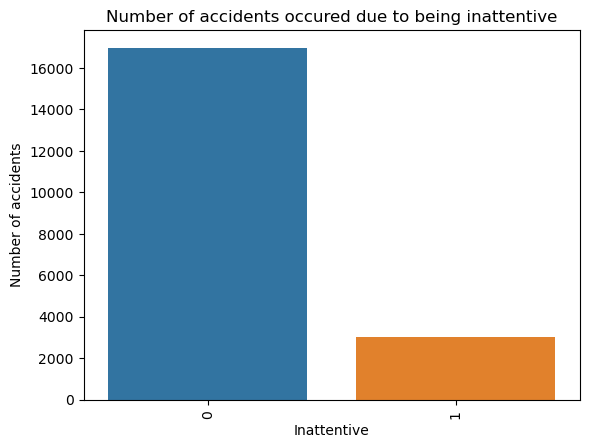

In [42]:
#Accidents due to Inattention
sns.barplot(x=f.index, y=f.values)
plt.title('Number of accidents occured due to being inattentive')
plt.xlabel('Inattentive')
plt.ylabel('Number of accidents')
plt.xticks(rotation=90)
plt.show()

In [43]:
g = data.groupby('SPEEDING')['SPEEDING'].count()

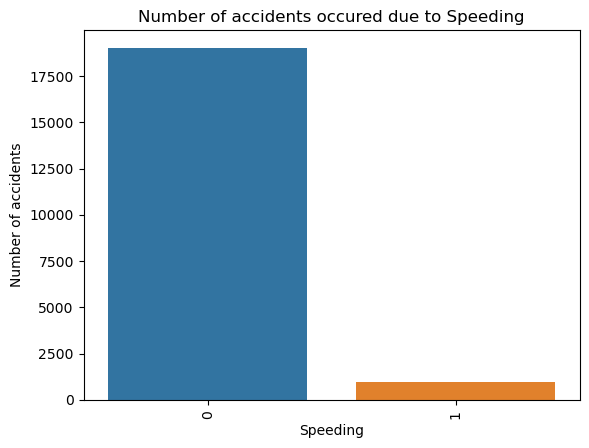

In [44]:
#Accidents due to Speeding
sns.barplot(x=g.index, y=g.values)
plt.title('Number of accidents occured due to Speeding')
plt.xlabel('Speeding')
plt.ylabel('Number of accidents')
plt.xticks(rotation=90)
plt.show()

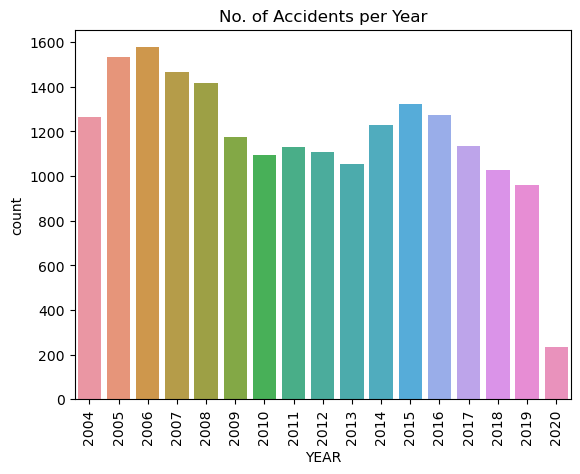

In [45]:
#According to year
sns.countplot(x='YEAR',data=data)
plt.title('No. of Accidents per Year')
plt.xticks(rotation=90)
plt.show()

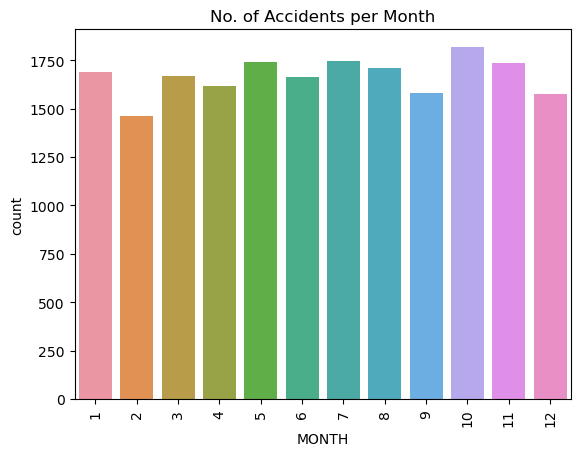

In [46]:
#According to month
sns.countplot(x='MONTH',data=data)
plt.title('No. of Accidents per Month')
plt.xticks(rotation=90)
plt.show()

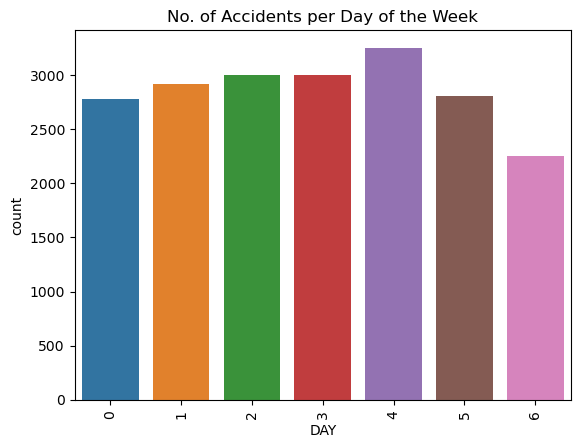

In [47]:
#According to day of the week
sns.countplot(x='DAY',data=data)
plt.title('No. of Accidents per Day of the Week')
plt.xticks(rotation=90)
plt.show()

In [48]:
h = data.groupby('DAY')['DAY'].count()

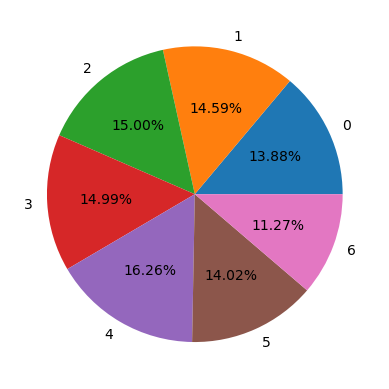

In [49]:
#Pie chart of Number of Accidents according to day of the week
plt.pie(h, labels=h.index, autopct='%.2f%%')
plt.show()

In [50]:
i = data.groupby('MONTH')['MONTH'].count()

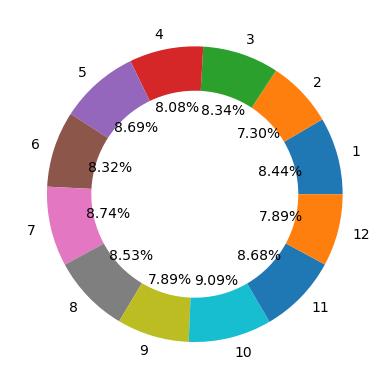

In [51]:
#Donut chart of Number of Accidents according to Month of Year
plt.pie(i, labels=i.index, autopct='%.2f%%', wedgeprops=dict(width=0.3))
plt.show()

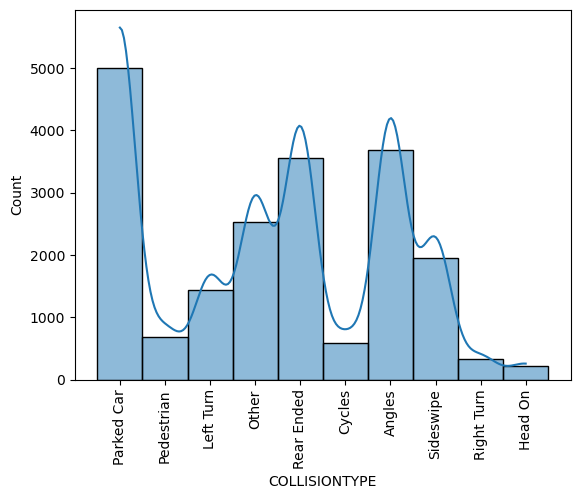

In [52]:
#Histogram of COLLISIONTYPE
sns.histplot(data['COLLISIONTYPE'], bins=20, kde=True)
plt.xticks(rotation=90)
plt.show()

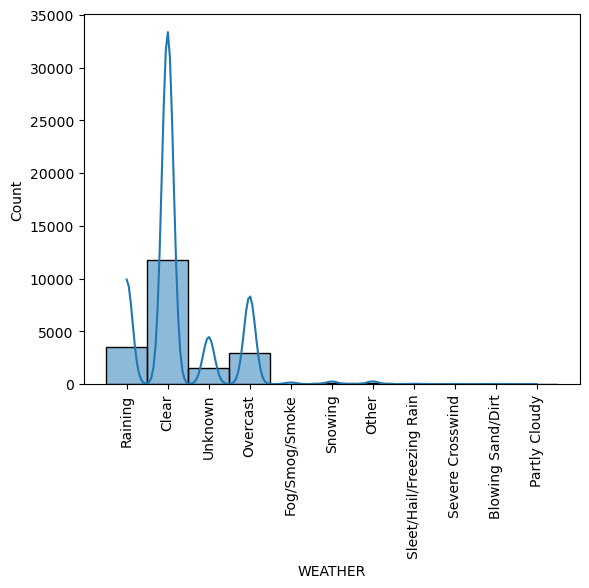

In [53]:
#Histogram of WEATHER
sns.histplot(data['WEATHER'], bins=20, kde=True)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='PERSONCOUNT'>

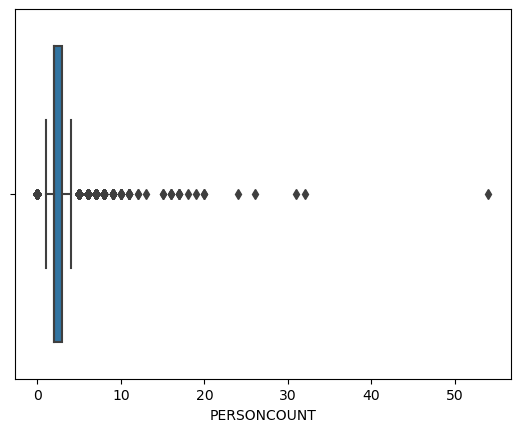

In [54]:
#Boxplot of PERSONCOUNT
sns.boxplot(x = 'PERSONCOUNT', data=data)

<Axes: xlabel='YEAR'>

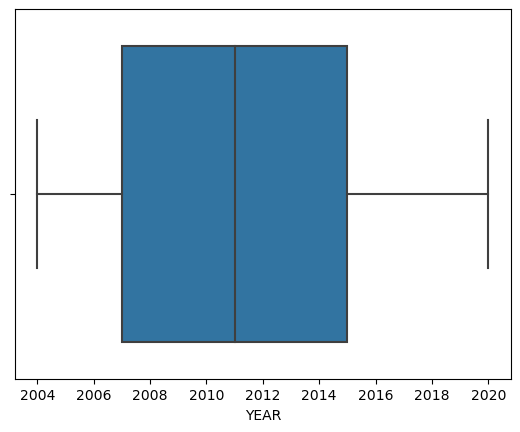

In [55]:
#Boxplot of YEAR
sns.boxplot(x = 'YEAR', data=data)

<Axes: xlabel='SEVERITYCODE', ylabel='YEAR'>

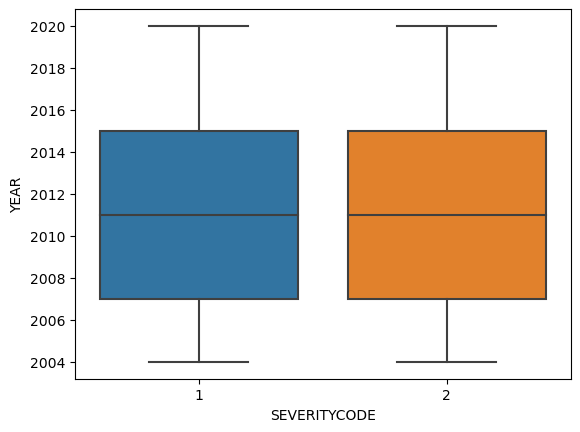

In [56]:
#Boxplot of SEVERITYCODE v/s YEAR
sns.boxplot(y = 'YEAR', x = 'SEVERITYCODE', data=data)

<Axes: xlabel='PERSONCOUNT', ylabel='PEDCOUNT'>

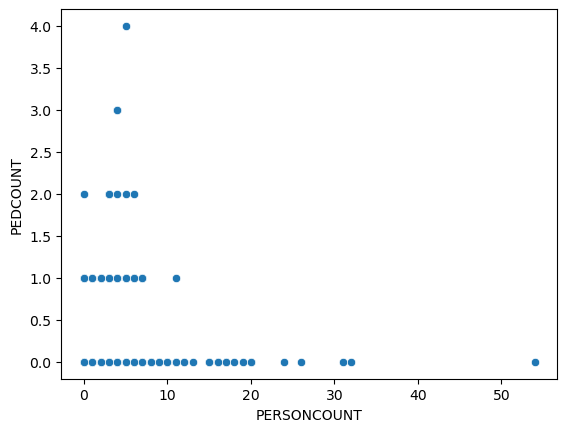

In [57]:
#Scatter plot of PERSONCOUNT vs PEDCOUNT
sns.scatterplot(x='PERSONCOUNT', y='PEDCOUNT', data=data)

<Axes: xlabel='PERSONCOUNT', ylabel='PEDCOUNT'>

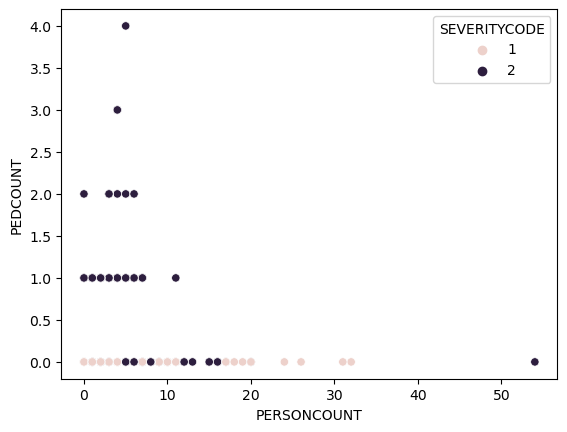

In [58]:
#Scatter plot of PERSONCOUNT vs PEDCOUNT with hue 'SEVERITYCODE'
sns.scatterplot(x='PERSONCOUNT', y='PEDCOUNT', hue='SEVERITYCODE', data=data)

<Axes: xlabel='SEVERITYCODE', ylabel='count'>

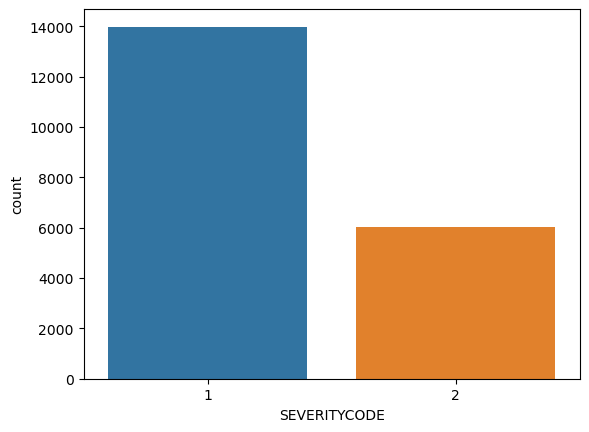

In [59]:
#Count plot of SEVERITYCODE
sns.countplot(x='SEVERITYCODE', data=data)

<Axes: xlabel='SEVERITYCODE', ylabel='DAY'>

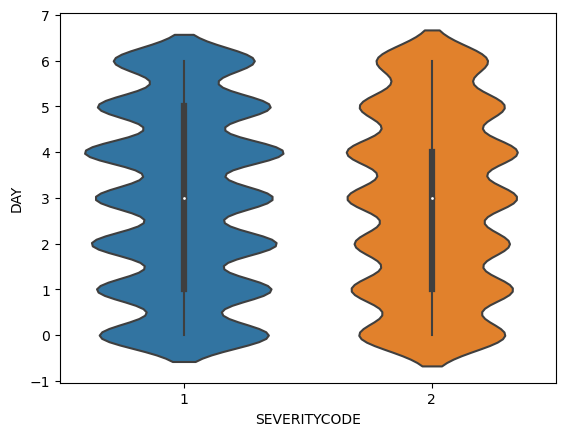

In [60]:
#Violin plot of SEVERITYCODE vs DAY
sns.violinplot(x='SEVERITYCODE', y='DAY', data=data)

<Axes: xlabel='PERSONCOUNT'>

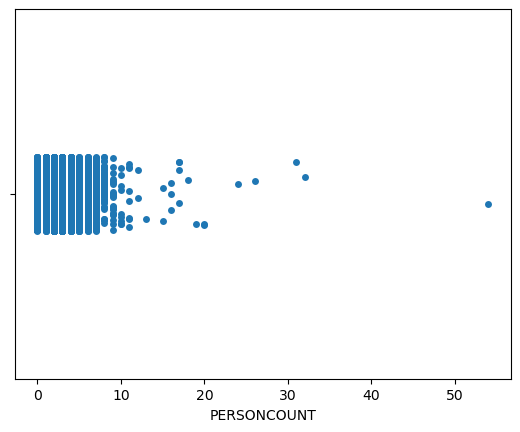

In [61]:
#Stripplot of PERSONCOUNT
sns.stripplot(x='PERSONCOUNT', data=data)

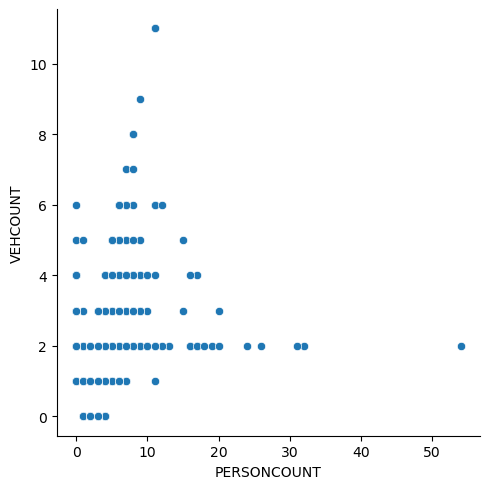

In [62]:
#rel plot of PERSONCOUNT vs VEHCOUNT
sns.relplot(x='PERSONCOUNT', y='VEHCOUNT', data=data)

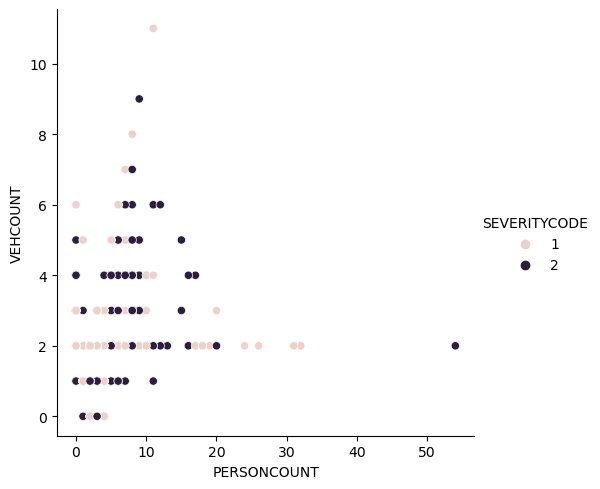

In [63]:
#rel plot of PERSONCOUNT vs VEHCOUNT with hue 'SEVERITYCODE'
sns.relplot(x='PERSONCOUNT', y='VEHCOUNT', hue = 'SEVERITYCODE', data=data)

<Axes: xlabel='SPEEDING', ylabel='Density'>

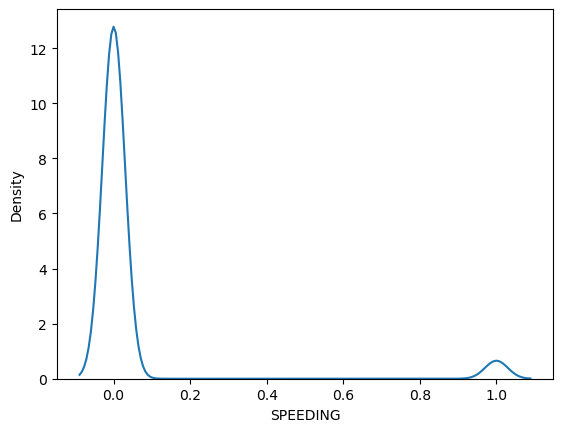

In [64]:
#kde plot of SPEEDING
sns.kdeplot(x='SPEEDING', data=data)

<Axes: xlabel='SPEEDING', ylabel='Density'>

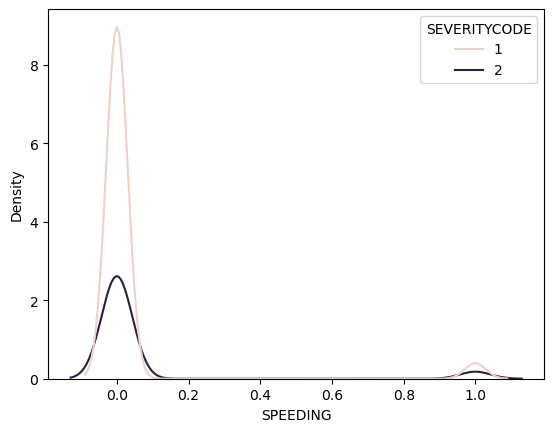

In [65]:
#kde plot of SPEEDING with hue 'SEVERITYCODE'
sns.kdeplot(x='SPEEDING', hue='SEVERITYCODE', data=data)

<Axes: xlabel='YEAR', ylabel='Proportion'>

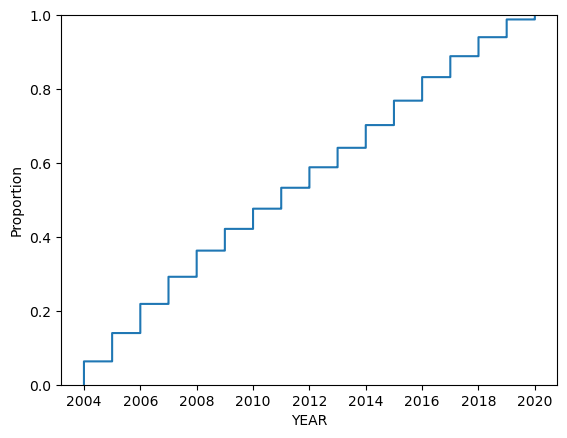

In [66]:
#Ecdf plot of YEAR
sns.ecdfplot(x='YEAR', data=data)

<Axes: xlabel='PERSONCOUNT', ylabel='VEHCOUNT'>

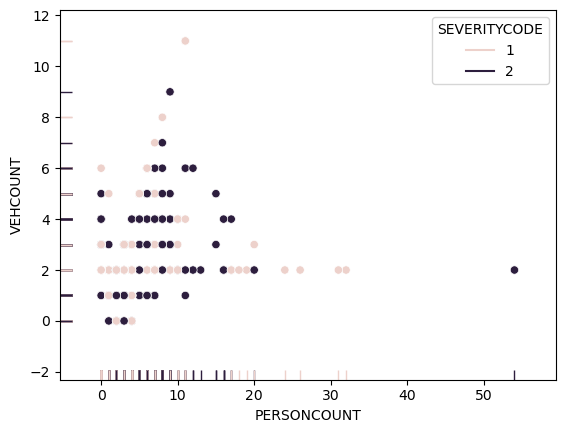

In [67]:
#rug plot of PERSONCOUNT vs VEHCOUNT with hue 'SEVERITYCODE'
sns.scatterplot(x='PERSONCOUNT', y='VEHCOUNT', hue = 'SEVERITYCODE', data=data)
sns.rugplot(x='PERSONCOUNT', y='VEHCOUNT', hue = 'SEVERITYCODE', data=data)

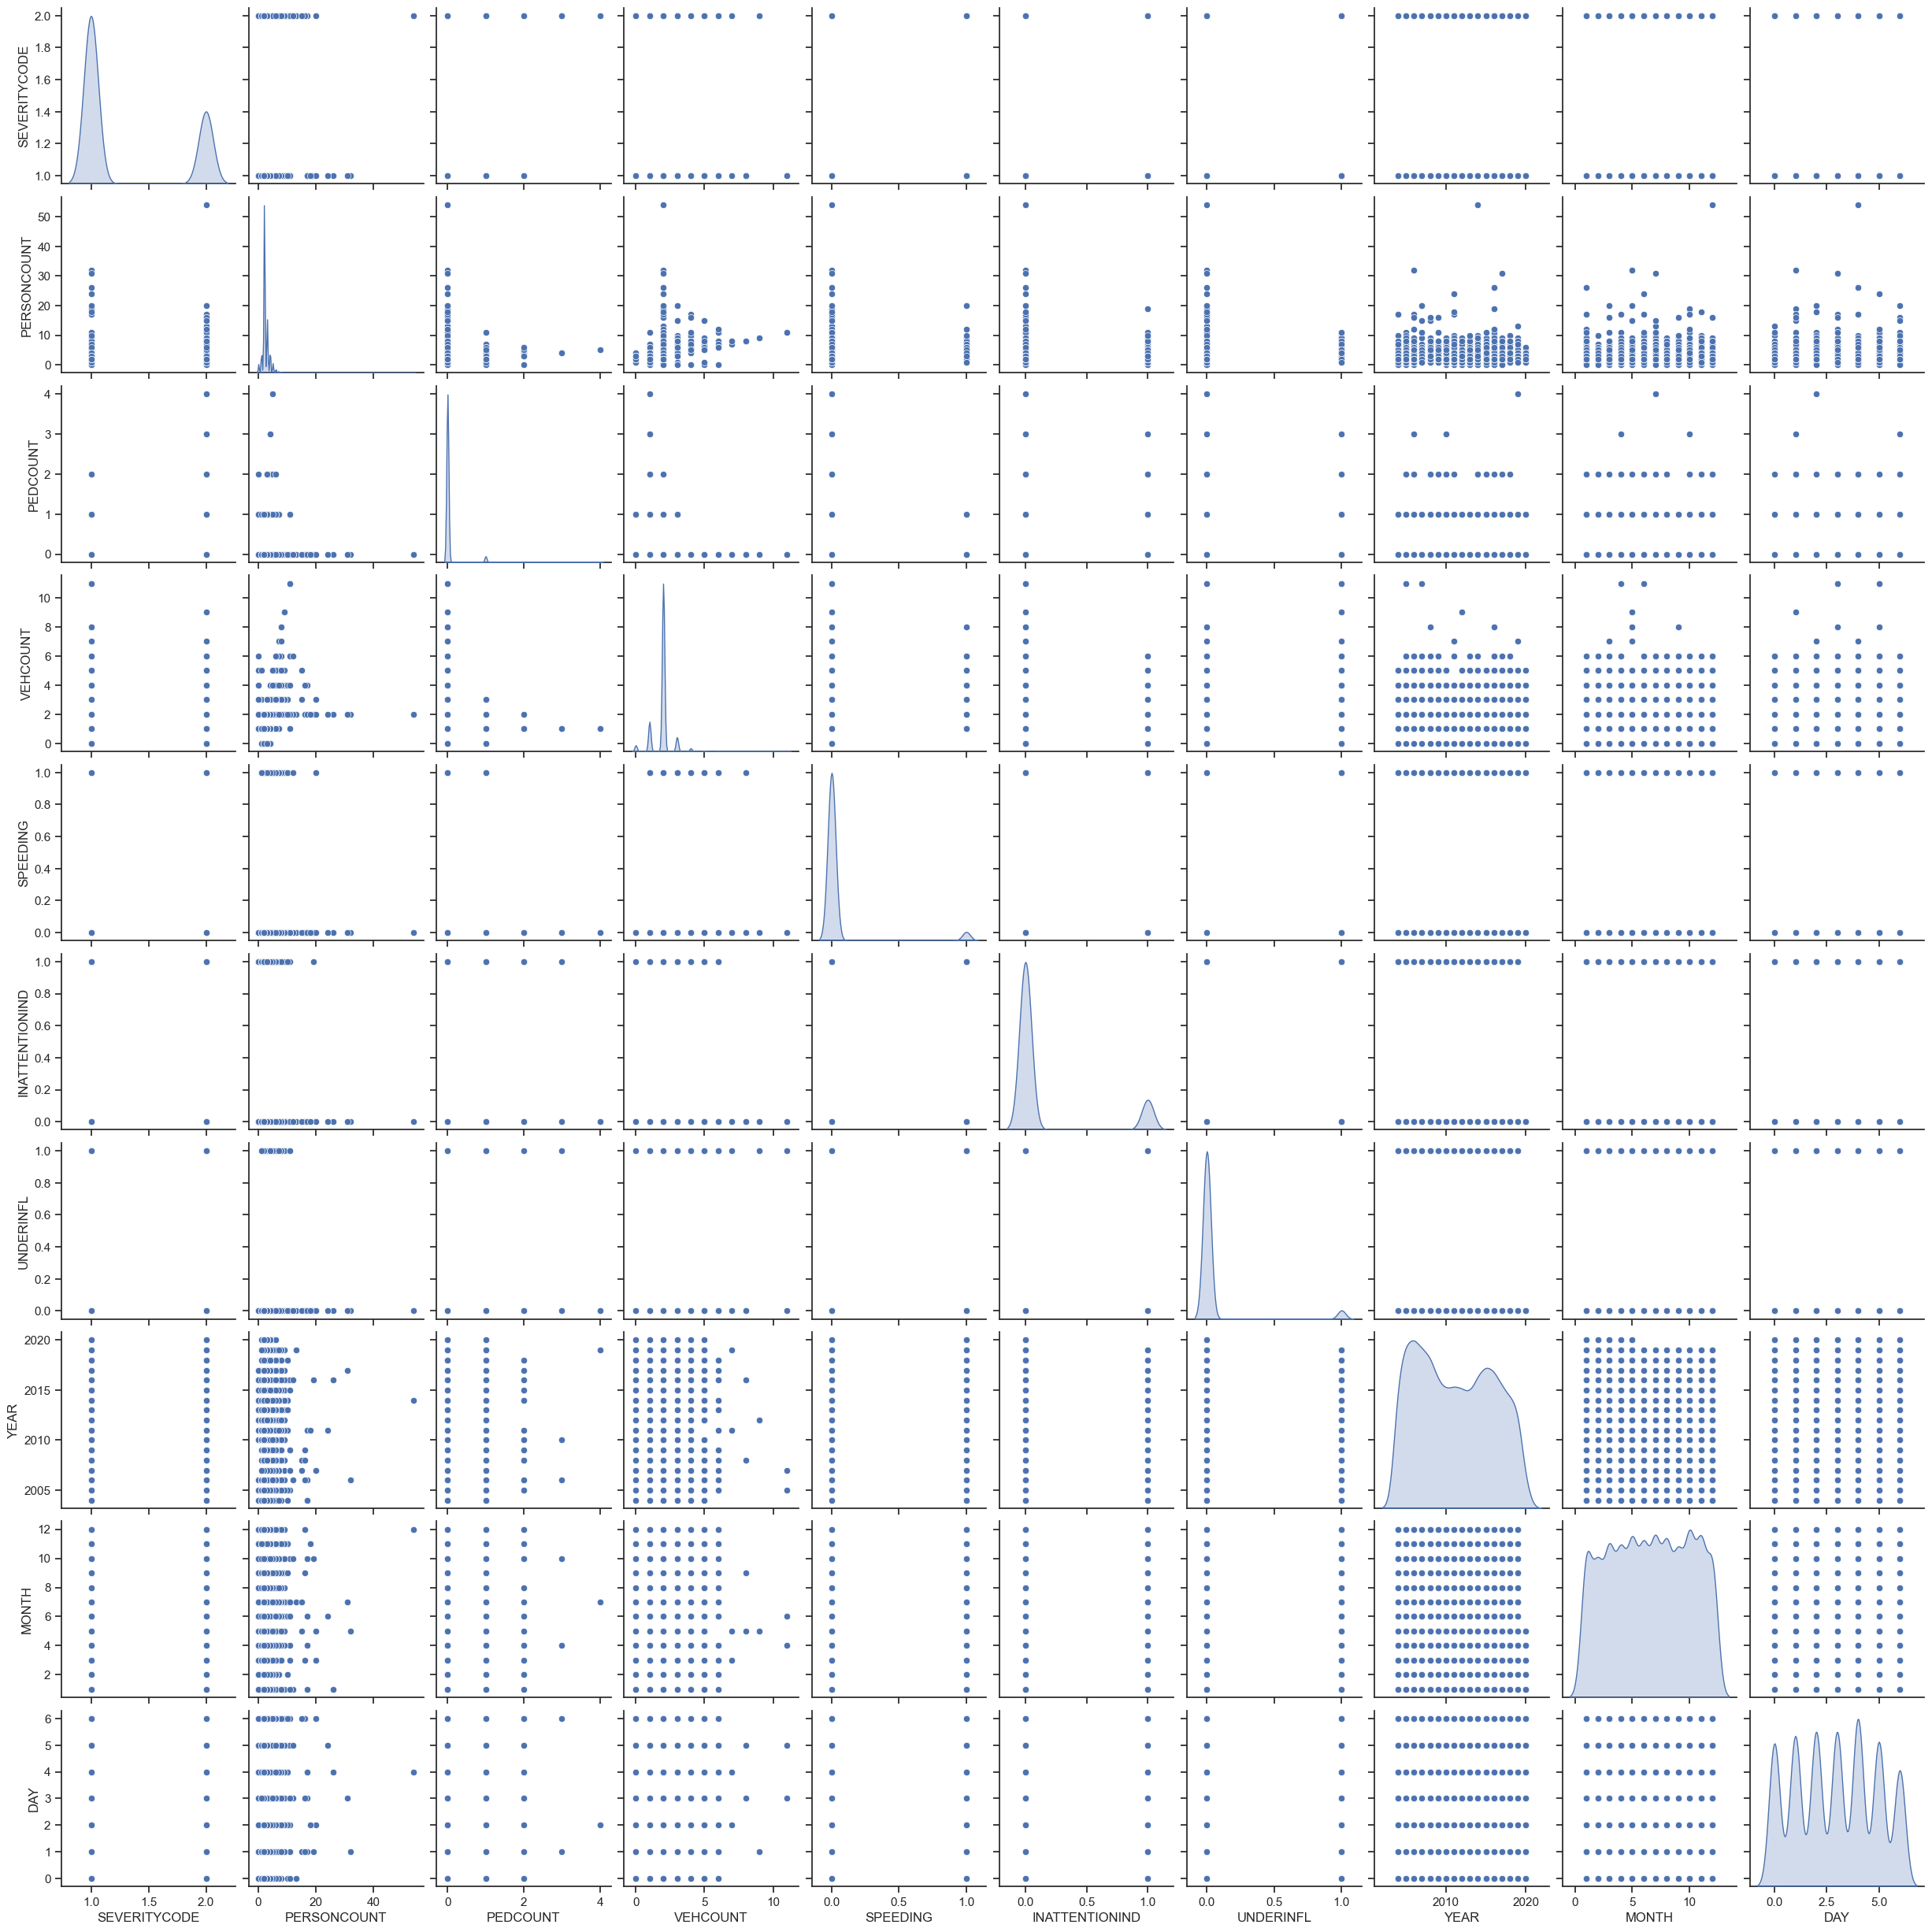

In [68]:
#Pair plot of data
sns.set(style="ticks")
sns.pairplot(data, diag_kind="kde", markers="o")

# Machine Learning and Modelling

# Logistic Regression

In [69]:
#Importing libraries required for OneHotEncoding
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [70]:
#encoding categorical columns in a DataFrame using the OneHotEncoder
categorical_cols = ['ADDRTYPE', 'COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
encoder = OneHotEncoder(drop='first', sparse=False)
encoder_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

In [71]:
encoder_cols

,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,...,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19996,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19997,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [72]:
#Data types of each column
data.dtypes

SEVERITYCODE        int64
ADDRTYPE           object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
VEHCOUNT            int64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING            int64
INATTENTIONIND      int64
UNDERINFL         float64
YEAR                int32
MONTH               int32
DAY                 int32
dtype: object

In [73]:
#scaling numerical columns in a DataFrame using the StandardScaler
numerical_cols = ['PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT', 'SPEEDING','INATTENTIONIND', 'UNDERINFL', 'YEAR', 'MONTH', 'DAY']
scaler = StandardScaler()
scaled_cols = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [74]:
scaled_cols.head()

,PERSONCOUNT,PEDCOUNT,VEHCOUNT,SPEEDING,INATTENTIONIND,UNDERINFL,YEAR,MONTH,DAY
0,-1.816883,-0.186829,3.234703,-0.226259,-0.422388,-0.225403,1.250168,-1.036842,1.596597
1,0.417218,-0.186829,-2.981248,-0.226259,-0.422388,-0.225403,1.890459,-1.328725,-1.516639
2,0.417218,4.931777,-1.427260,-0.226259,-0.422388,-0.225403,-0.457274,1.590107,-1.516639
3,-0.327482,-0.186829,0.126728,-0.226259,-0.422388,-0.225403,1.463598,0.422574,-1.516639
4,-1.072183,-0.186829,-1.427260,-0.226259,-0.422388,4.436499,1.036738,-1.328725,1.596597


# Data Preprocessing

In [75]:
X = pd.concat([encoder_cols, scaled_cols], axis=1)
Y = data['SEVERITYCODE']

In [76]:
#Spliting the data into Training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [77]:
#Creating Logistic Regression model 
model = LogisticRegression()

In [78]:
#Training the model
model.fit(X_train, Y_train)

LogisticRegression()

In [79]:
#Calculating Train Score
print('Train Score : ', model.score(X_train, Y_train))

Train Score :  0.7546875


In [80]:
#Calculating Test Score
print('Test Score : ', model.score(X_test, Y_test))

Test Score :  0.75575


In [81]:
#Predicting the train value
pred_train = model.predict(X_train)

In [82]:
#Predicting the test value
pred_test = model.predict(X_test)

In [83]:
#Classification report for the Training set
print(metrics.classification_report(Y_train, pred_train))

              precision    recall  f1-score   support

           1       0.76      0.95      0.84     11185
           2       0.73      0.30      0.42      4815

    accuracy                           0.75     16000
   macro avg       0.74      0.62      0.63     16000
weighted avg       0.75      0.75      0.72     16000



In [84]:
#Classification report for the Testing set
print(metrics.classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           1       0.76      0.95      0.84      2793
           2       0.73      0.31      0.43      1207

    accuracy                           0.76      4000
   macro avg       0.74      0.63      0.64      4000
weighted avg       0.75      0.76      0.72      4000



In [85]:
#Calculating accuracy and f1 score of the logistic model
LR_acc = accuracy_score(Y_test, pred_test)
LR_f1 = f1_score(Y_test, pred_test)

In [86]:
print('Logistic Regression accuracy: ',LR_acc)
print('Logistic Regression f1 score: ',LR_f1)

Logistic Regression accuracy:  0.75575
Logistic Regression f1 score:  0.8445010345376412


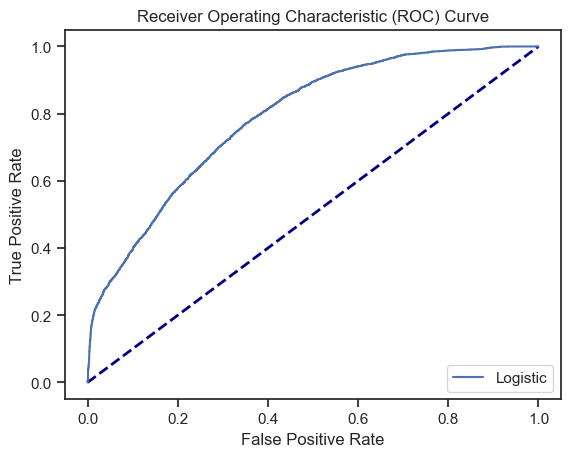

In [87]:
#plotting AUC-ROC curve 

roc=model.predict_proba(X_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_train,roc, pos_label=2)
plt.plot([0,1], [0,1],'k--', color='navy', lw=2) 
plt.plot(fpr,tpr,label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [88]:
#ROC-AUC Score
metrics.roc_auc_score(Y_train, roc)

0.7888205211047468

# Logistic Regression - Grid Search

In [89]:
# Defining hyperparameters and their possible values for tuning
param_grid = {
    'penalty' : ['l1', 'l2'],                         #l1 lasso l2 Ridge
    'C' : [0.1, 0.5, 1, 5, 10]
}

In [90]:
# Creating a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [91]:
# Fitting the GridSearchCV object to the training data
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [92]:
# Getting the best hyperparameters
best_param_lr_gs = grid.best_params_

# Getting the best model
best_model_lr_gs = grid.best_estimator_

In [93]:
# Making predictions on the test set
Y_pred_lr_gs = best_model_lr_gs.predict(X_test)

In [94]:
# Evaluating the best model
LR_GS_acc = accuracy_score(Y_test, Y_pred_lr_gs)
pre = precision_score(Y_test, Y_pred_lr_gs)
rec = recall_score(Y_test, Y_pred_lr_gs)
LR_GS_f1 = f1_score(Y_test, Y_pred_lr_gs)
roc_auc = roc_auc_score(Y_test, Y_pred_lr_gs)

In [95]:
print('Best Param of Logistic regression after grid search :  ', best_param_lr_gs)
print('Accuracy of Logistic regression after grid search : ', LR_GS_acc)               #Accuracy is the proportion of correct predictions over total predictions. 
print('Precision of Logistic regression after grid search : ', pre)              #Precision measures how good our model is when the prediction is positive. 
print("Recall of Logistic regression after grid search : ", rec)                 #Recall measures how good our model is at correctly predicting positive classes.
print('Fl Score of Logistic regression after grid search : ', LR_GS_f1)                # F1 score is a machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model. 
print('ROC-AUC Score of Logistic regression after grid search : ', roc_auc)      #The ROC AUC score tells us how efficient the model is.

Best Param of Logistic regression after grid search :   {'C': 0.1, 'penalty': 'l2'}
Accuracy of Logistic regression after grid search :  0.756
Precision of Logistic regression after grid search :  0.7593491293177277
Recall of Logistic regression after grid search :  0.9523809523809523
Fl Score of Logistic regression after grid search :  0.8449809402795426
ROC-AUC Score of Logistic regression after grid search :  0.6269775515840138


In [96]:
#Confusion Matrix after Grid Search
cm_gs = confusion_matrix(Y_test, Y_pred_lr_gs)
print('Confusion Matrix:')
print(cm_gs)
print('True Positives(TP) = ', cm_gs[0,0])
print('True Negatives(TN) = ', cm_gs[1,1])
print('False Positives(FP) = ', cm_gs[0,1])
print('False Negatives(FN) = ', cm_gs[1,0])

Confusion Matrix:
[[2660  133]
 [ 843  364]]
True Positives(TP) =  2660
True Negatives(TN) =  364
False Positives(FP) =  133
False Negatives(FN) =  843


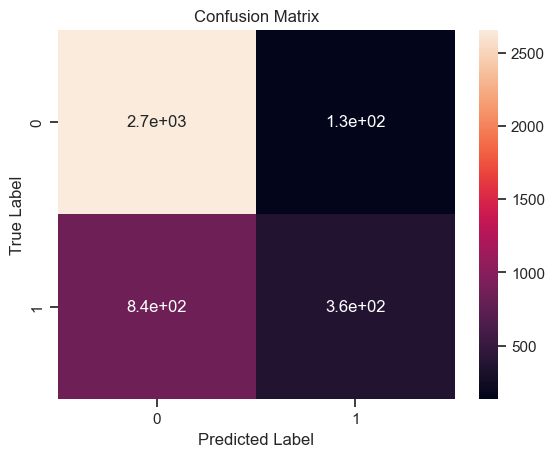

In [97]:
#Heatmap after grid search
sns.heatmap(cm_gs, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [98]:
#Classification report after Grid Search
classification_rep = classification_report(Y_test, Y_pred_lr_gs)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.95      0.84      2793
           2       0.73      0.30      0.43      1207

    accuracy                           0.76      4000
   macro avg       0.75      0.63      0.64      4000
weighted avg       0.75      0.76      0.72      4000



# Logistic Regression - Randomized Search

In [99]:
# Defining hyperparameters and their possible values for tuning
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0, scale=4)  # Random values between 0 and 4 for regularization strength (C)
}

In [100]:
# Creating a RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)

In [101]:
# Fitting the RandomizedSearchCV object to the training data
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000281B0B7CE10>,
                                        'penalty': ['l1', 'l2']},
                   random_state=42)

In [102]:
# Getting the best hyperparameters
best_param_lr_rs = random_search.best_params_

In [103]:
# Getting the best model
best_model_lr_rs = random_search.best_estimator_

In [104]:
# Making predictions on the test set
Y_pred_lr_rs = best_model_lr_rs.predict(X_test)

In [105]:
# Evaluating the best model
LR_RS_acc = accuracy_score(Y_test, Y_pred_lr_rs)
pre = precision_score(Y_test, Y_pred_lr_rs)
rec = recall_score(Y_test, Y_pred_lr_rs)
LR_RS_f1 = f1_score(Y_test, Y_pred_lr_rs)
roc_auc = roc_auc_score(Y_test, Y_pred_lr_rs)

In [106]:
print('Best Param of randomized regression after grid search :  ', best_param_lr_rs)
print('Accuracy of randomized regression after grid search : ', LR_RS_acc)
print('Precision of randomized regression after grid search : ', pre)
print("Recall of randomized regression after grid search : ", rec)
print('Fl Score of randomized regression after grid search : ', LR_RS_f1)
print('ROC-AUC Score of randomized regression after grid search : ', roc_auc)

Best Param of randomized regression after grid search :   {'C': 0.13755408446087358, 'penalty': 'l2'}
Accuracy of randomized regression after grid search :  0.75625
Precision of randomized regression after grid search :  0.7598627787307033
Recall of randomized regression after grid search :  0.9516648764769066
Fl Score of randomized regression after grid search :  0.8450166905102529
ROC-AUC Score of randomized regression after grid search :  0.6278622642533663


In [107]:
#Confusion Matrix after Randomized Search
cm_rs = confusion_matrix(Y_test, Y_pred_lr_rs)
print('Confusion Matrix:')
print(cm_rs)
print('True Positives(TP) = ', cm_rs[0,0])
print('True Negatives(TN) = ', cm_rs[1,1])
print('False Positives(FP) = ', cm_rs[0,1])
print('False Negatives(FN) = ', cm_rs[1,0])

Confusion Matrix:
[[2658  135]
 [ 840  367]]
True Positives(TP) =  2658
True Negatives(TN) =  367
False Positives(FP) =  135
False Negatives(FN) =  840


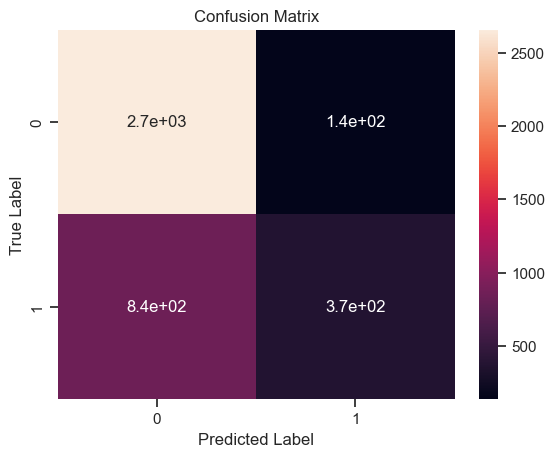

In [108]:
#Heatmap after Randomized Search
sns.heatmap(cm_rs, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [109]:
#Classification report after Randomized Search
classification_rep = classification_report(Y_test, Y_pred_lr_rs)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.95      0.85      2793
           2       0.73      0.30      0.43      1207

    accuracy                           0.76      4000
   macro avg       0.75      0.63      0.64      4000
weighted avg       0.75      0.76      0.72      4000



# K Nearest Neighbor (KNN)

In [110]:
# creating k-nearest neighbors classifier (knn) with the number of neighbors set to 10
knn = KNeighborsClassifier(n_neighbors=10)

#Training the model
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [111]:
# accuracy score of a k-nearest neighbors classifier (knn) on the test data
knn.score(X_test,Y_test)

0.7375

In [112]:
#Making prediction on test set
Y_pred_knn= knn.predict(X_test)

In [113]:
#Accuracy of KNN model
KNN_acc = accuracy_score(Y_test, Y_pred_knn)
print("Accuracy Score : {:.2f}%". format(KNN_acc*100))

Accuracy Score : 73.75%


In [114]:
#F1 score of KNN model
KNN_f1 = f1_score(Y_test, Y_pred_knn)
print("F1 Score : {:.2f}%". format(KNN_f1*100))

F1 Score : 82.88%


In [115]:
#Classification report of KNN model
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           1       0.76      0.91      0.83      2793
           2       0.62      0.34      0.44      1207

    accuracy                           0.74      4000
   macro avg       0.69      0.62      0.63      4000
weighted avg       0.72      0.74      0.71      4000



In [116]:
#Confusion Matrix of KNN model
cm=confusion_matrix(Y_test, Y_pred_knn)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[2542  251]
 [ 799  408]]
True Positives(TP) =  2542
True Negatives(TN) =  408
False Positives(FP) =  251
False Negatives(FN) =  799


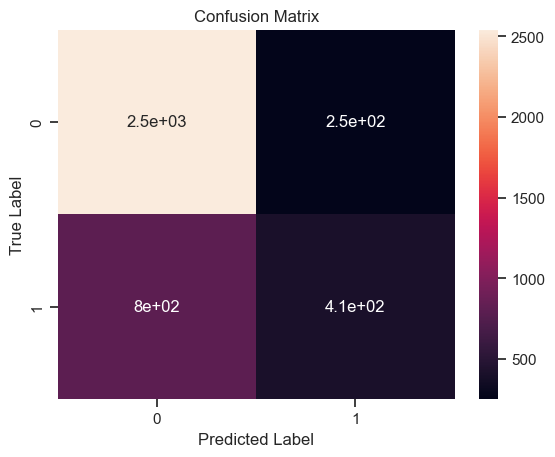

In [117]:
#Heatmap of KNN model
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

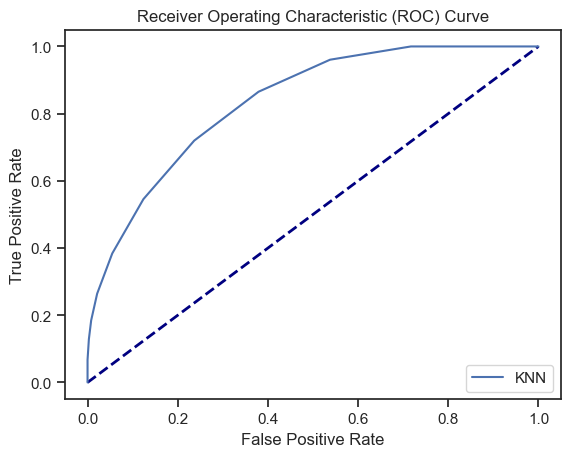

In [118]:
#AUC-ROC curve is plotted 

roc=knn.predict_proba(X_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_train,roc, pos_label=2)
plt.plot([0,1], [0,1],'k--', color='navy', lw=2) 
plt.plot(fpr,tpr,label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# KNN - Grid Search

In [119]:
#Defining hyper parameter
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Weighting type
    'p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

In [120]:
knn_gs = KNeighborsClassifier()            # Create a k-nearest neighbors classifier instance
grid_search_knn = GridSearchCV(knn_gs, param_grid_knn, cv=5,scoring='accuracy')               # Perform grid search with cross-validation
grid_search_knn.fit(X_train, Y_train)      # Fit the grid search to the training data

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [121]:
best_param_knn = grid_search_knn.best_params_           #best hyperparameters from the grid search results
best_knn_gs = KNeighborsClassifier(n_neighbors = best_param_knn['n_neighbors'], weights = best_param_knn['weights'],p=best_param_knn['p'])    #new k-nearest neighbors classifier is created with the optimal hyperparameters obtained from the grid search
best_knn_gs.fit(X_train, Y_train)            #fits the newly created k-nearest neighbors classifier to the training data          
Y_pred_knn_gs = best_knn_gs.predict(X_test)             #optimized k-nearest neighbors classifier is used to make predictions on the test data

In [122]:
print("Best Hyperparameter : ", best_param_knn)

Best Hyperparameter :  {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [123]:
#Accuracy of KNN model after grid search
KNN_GS_acc = accuracy_score(Y_test, Y_pred_knn_gs)
print("Accuracy Score after Grid Search : {:.2f}%". format(KNN_GS_acc*100))

Accuracy Score after Grid Search : 73.02%


In [124]:
#F1 score of KNN model after grid search
KNN_GS_f1 = f1_score(Y_test, Y_pred_knn_gs)
print("F1 Score after Grid Search : {:.2f}%". format(KNN_GS_f1*100))

F1 Score after Grid Search : 81.81%


In [125]:
#Classificaton report of KNN model after grid search
print (classification_report(Y_test, Y_pred_knn_gs))

              precision    recall  f1-score   support

           1       0.77      0.87      0.82      2793
           2       0.57      0.41      0.48      1207

    accuracy                           0.73      4000
   macro avg       0.67      0.64      0.65      4000
weighted avg       0.71      0.73      0.72      4000



In [126]:
#Confusion matrix of KNN model after grid search
cm_knn_gs=confusion_matrix(Y_test, Y_pred_knn_gs)
print('Confusion matrix : ')
print(cm_knn_gs)
print('True Positives(TP) = ', cm_knn_gs[0,0])
print('True Negatives(TN) = ', cm_knn_gs[1,1])
print('False Positives(FP) = ', cm_knn_gs[0,1])
print('False Negatives(FN) = ', cm_knn_gs[1,0])

Confusion matrix : 
[[2427  366]
 [ 713  494]]
True Positives(TP) =  2427
True Negatives(TN) =  494
False Positives(FP) =  366
False Negatives(FN) =  713


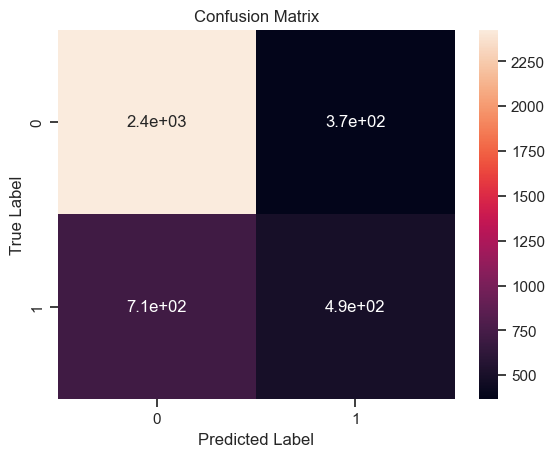

In [127]:
#Heatmap of KNN model after grid search
sns.heatmap(cm_knn_gs, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Evaluating the best model using cross-validation

In [128]:
cross_val_scores = cross_val_score(best_knn_gs, X, Y, cv=5, scoring='accuracy')
mean_accuracy = cross_val_scores.mean()        # mean accuracy is calculated by taking the mean of the cross-validated accuracy scores
print("Cross-Validation Mean Accuracy : {:.2f}%". format(mean_accuracy*100))

Cross-Validation Mean Accuracy : 72.79%


# KNN - Choosing the right k

In [129]:
# Define a range of k values to explore
k_values = list(range(1, 21))  # Explore k values from 1 to 20

In [130]:
# Initialize lists to store mean accuracy for each k
mean_accuracies = []

In [131]:
# Iterate through different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform cross-validation with k neighbors
    scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(scores)
    mean_accuracies.append(mean_accuracy)

In [132]:
# Find the optimal k
optimal_k = k_values[mean_accuracies.index(max(mean_accuracies))]

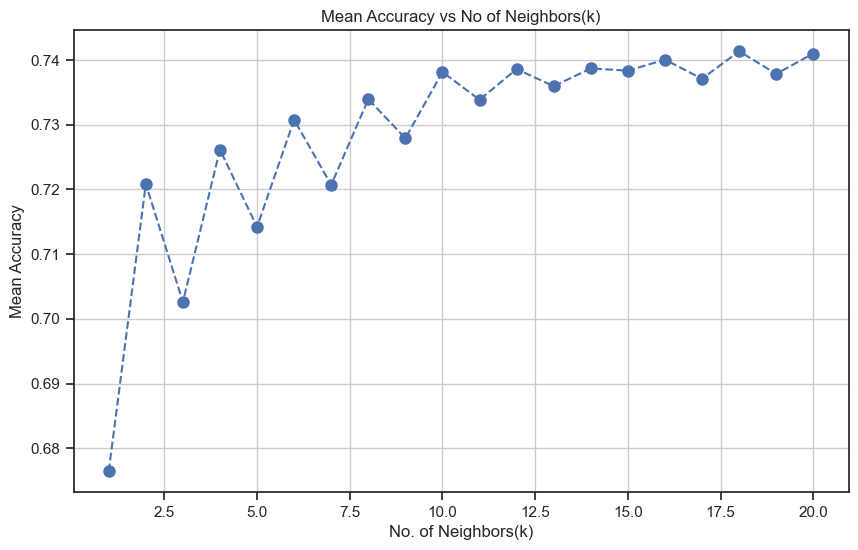

In [133]:
# Plot the mean accuracy for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='dashed', markersize=8)
plt.title("Mean Accuracy vs No of Neighbors(k)")
plt.xlabel("No. of Neighbors(k)")
plt.ylabel("Mean Accuracy")
plt.grid()
plt.show()

In [134]:
#Print the optimal k
print("Optimal k : ", optimal_k)

Optimal k :  18


# KNN - Euclidean

In [135]:
#Creates a k-nearest neighbors classifier with 10 neighbors and Euclidean distance metric.
knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

In [136]:
#Training the model
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [137]:
#Making prediction on test set
Y_pred_knn_e = knn_classifier.predict(X_test)

In [138]:
#accuracy of knn model 
KNN_E_acc = accuracy_score(Y_test, Y_pred_knn_e)  # For classification
print("Accuracy Score after Euclidean Method : {:.2f}%". format(KNN_E_acc*100))

Accuracy Score after Euclidean Method : 73.75%


In [139]:
#F1 score of KNN model
KNN_E_f1 = f1_score(Y_test, Y_pred_knn_e)  # For classification
print("F1 Score after Euclidean Method : {:.2f}%". format(KNN_E_f1*100))

F1 Score after Euclidean Method : 82.88%


In [140]:
#classification_report of KNN model
print(classification_report(Y_test, Y_pred_knn_e))

              precision    recall  f1-score   support

           1       0.76      0.91      0.83      2793
           2       0.62      0.34      0.44      1207

    accuracy                           0.74      4000
   macro avg       0.69      0.62      0.63      4000
weighted avg       0.72      0.74      0.71      4000



In [141]:
#Confusion matrix of KNN model
cm_knn_e=confusion_matrix(Y_test, Y_pred_knn_e)
print('Confusion matrix : ')
print(cm_knn_e)
print('True Positives(TP) = ', cm_knn_e[0,0])
print('True Negatives(TN) = ', cm_knn_e[1,1])
print('False Positives(FP) = ', cm_knn_e[0,1])
print('False Negatives(FN) = ', cm_knn_e[1,0])

Confusion matrix : 
[[2542  251]
 [ 799  408]]
True Positives(TP) =  2542
True Negatives(TN) =  408
False Positives(FP) =  251
False Negatives(FN) =  799


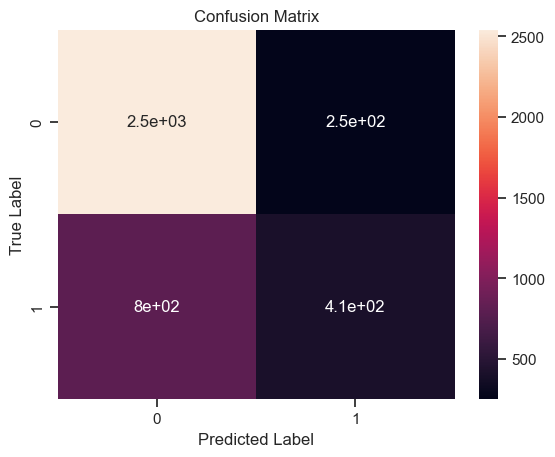

In [142]:
#Heatmap of KNN model
sns.heatmap(cm_knn_e, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# KNN - Manhatan

In [143]:
#Creates a k-nearest neighbors classifier with 10 neighbors and Manhatan distance metric
knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='manhattan')

In [144]:
#Training the model
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [145]:
#Making pedictions on the test set
Y_pred_knn_m = knn_classifier.predict(X_test)

In [146]:
#Accuracy of the KNN model
KNN_M_acc = accuracy_score(Y_test, Y_pred_knn_m) 
print("Accuracy Score after Manhatan Distance Method : {:.2f}%". format(KNN_M_acc*100))

Accuracy Score after Manhatan Distance Method : 73.80%


In [147]:
#F1 score of the KNN model
KNN_M_f1 = f1_score(Y_test, Y_pred_knn_m) 
print("F1 Score after Manhatan Distance Method : {:.2f}%". format(KNN_M_f1*100))

F1 Score after Manhatan Distance Method : 83.04%


In [148]:
#Classification report of the KNN model
print(classification_report(Y_test, Y_pred_knn_m))

              precision    recall  f1-score   support

           1       0.76      0.92      0.83      2793
           2       0.63      0.32      0.42      1207

    accuracy                           0.74      4000
   macro avg       0.69      0.62      0.63      4000
weighted avg       0.72      0.74      0.71      4000



In [149]:
#Confusion matrix of the KNN model
cm_knn_m=confusion_matrix(Y_test, Y_pred_knn_m)
print('Confusion matrix : ')
print(cm_knn_m)
print('True Positives(TP) = ', cm_knn_m[0,0])
print('True Negatives(TN) = ', cm_knn_m[1,1])
print('False Positives(FP) = ', cm_knn_m[0,1])
print('False Negatives(FN) = ', cm_knn_m[1,0])

Confusion matrix : 
[[2565  228]
 [ 820  387]]
True Positives(TP) =  2565
True Negatives(TN) =  387
False Positives(FP) =  228
False Negatives(FN) =  820


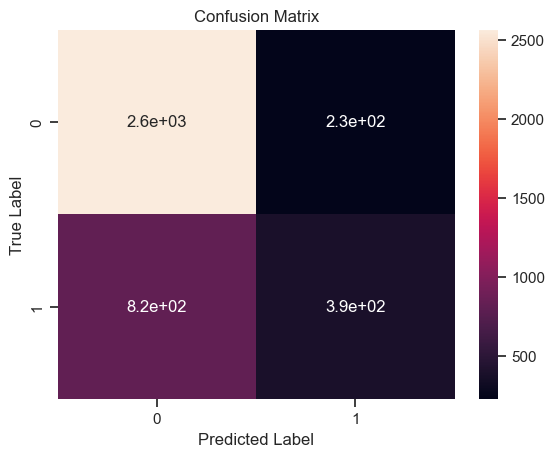

In [150]:
#Heatmap of the KNN model
sns.heatmap(cm_knn_m, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# SVM

In [151]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)       #Standardizes the feature scales of the training data using StandardScaler 
X_test = scaler.transform(X_test)     #transforming to the test data 

In [152]:
#Running with default hyperparameter
svc = SVC()

In [153]:
#Training the model
svc.fit(X_train, Y_train)

SVC()

In [154]:
#Making prediction on the test data
Y_pred_svm = svc.predict(X_test)

In [155]:
#Accuracy of SVM model
SVM_acc = accuracy_score(Y_test, Y_pred_svm)
print("Accuracy Score with default parameter : {:.2f}%". format(SVM_acc*100))

Accuracy Score with default parameter : 75.22%


In [156]:
#F1 of SVM model
SVM_f1 = f1_score(Y_test, Y_pred_svm)
print("F1 Score with default parameter : {:.2f}%". format(SVM_f1*100))

F1 Score with default parameter : 84.60%


In [157]:
#Classification report of SVM model
print(classification_report(Y_test, Y_pred_svm))

              precision    recall  f1-score   support

           1       0.75      0.97      0.85      2793
           2       0.80      0.24      0.37      1207

    accuracy                           0.75      4000
   macro avg       0.77      0.61      0.61      4000
weighted avg       0.76      0.75      0.70      4000



In [158]:
#Confusion Matrix of SVM model
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
print('Confusion matrix : ')
print(cm_svm)
print('True Positives(TP) = ', cm_svm[0,0])
print('True Negatives(TN) = ', cm_svm[1,1])
print('False Positives(FP) = ', cm_svm[0,1])
print('False Negatives(FN) = ', cm_svm[1,0])

Confusion matrix : 
[[2721   72]
 [ 919  288]]
True Positives(TP) =  2721
True Negatives(TN) =  288
False Positives(FP) =  72
False Negatives(FN) =  919


<Axes: >

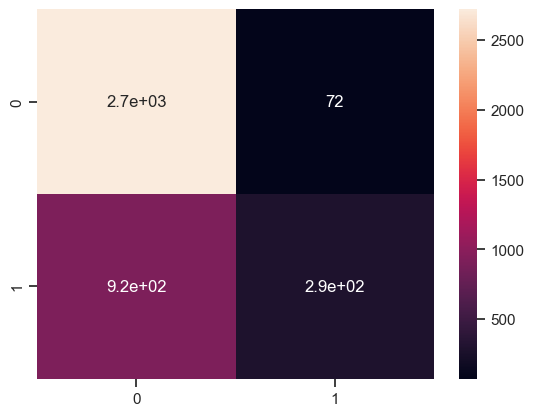

In [159]:
#Heatmap of SVM model
sns.heatmap(cm_svm, annot=True)

In [160]:
from sklearn.preprocessing import label_binarize
#Binarizes the multiclass labels (Y) into one-hot encoded vectors using label_binarize 
yb = label_binarize(Y, classes=[0,1])

In [161]:
#Assigns the number of columns (nc) in the binarized labels array (yb
nc = yb.shape[1]

In [162]:
#Creates a one-vs-rest classifier using Support Vector Machines (SVM) with a linear kernel, enabling probability estimates, and setting a fixed random state of 42
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

In [163]:
#decision function scores for the test data
Y_score = classifier.fit(X_train, Y_train).decision_function(X_test)

In [164]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range (nc):
    fpr, tpr, _ = roc_curve(Y_test, Y_score, pos_label=2)
    roc_auc = auc(fpr, tpr)

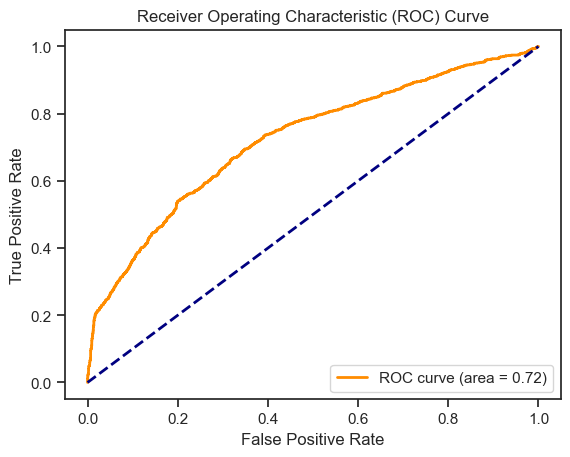

In [165]:
#AUC-ROC curve is plotted 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# SVM - Grid Search

In [165]:
#Grid Search

param_grid_svm = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [166]:
#Training the model
svcm = SVC()

In [167]:
#Initializes a grid search using the SVM classifier (svcm) with the specified parameter grid and 5-fold cross-validation
grid_search = GridSearchCV(svcm, param_grid_svm, cv=5)

In [ ]:
grid_search.fit(X_train, Y_train)

In [ ]:
#Finding the best hyper parameter
best_param_svm = grid_search.best_params_
print("Best hyperparameter : ", best_param_svm)

In [ ]:
#Creates a SVM classifier with the best hyperparameters obtained from a grid search
best_svm = SVC(C=best_param_svm['C'], kernel=best_param_svm['kernel'])

In [ ]:
#Fits the SVM classifier (best_svm) to the training data (X_train, Y_train) using the previously determined best hyperparameters.
best_svm.fit(X_train, Y_train)

In [ ]:
#Making predictions on the test data
Y_pred_svm_gs = best_svm.predict(X_test)

In [ ]:
#Accuracy of SVM model after grid search
SVM_GS_acc = accuracy_score(Y_test, Y_pred_svm_gs)
print("Accuracy after Grid Search : {:.2f}%". format(SVM_GS_acc * 100))

In [ ]:
#F1 score of SVM model after grid search
SVM_GS_f1 = f1_score(Y_test, Y_pred_svm_gs)
print("F1 score after Grid Search : {:.2f}%". format(SVM_GS_f1 * 100))

In [ ]:
#Classification report of SVM model after grid search
print(classification_report(Y_test, Y_pred_svm_gs))

In [ ]:
#Confusion matrix of SVM model after grid search
cm_svm_gs = confusion_matrix(Y_test, Y_pred_svm_gs)
print('Confusion matrix : ')
print(cm_svm_gs)
print('True Positives(TP) = ', cm_svm_gs[0,0])
print('True Negatives(TN) = ', cm_svm_gs[1,1])
print('False Positives(FP) = ', cm_svm_gs[0,1])
print('False Negatives(FN) = ', cm_svm_gs[1,0])

In [ ]:
#Heatmap of SVM model after grid search
sns.heatmap(cm_svm_gs, annot=True)

# SVM - Randomized Search

In [ ]:
#Tuning the model with Random Search

param_grid_svm_rs = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [ ]:
#Training the model
svcm_rs = SVC()

In [ ]:
##Initializes a randomized search using the SVM classifier (svcm) with the specified parameter grid and 5-fold cross-validation
random_search = RandomizedSearchCV(svcm_rs, param_grid_svm_rs, cv=5)

In [ ]:
random_search.fit(X_train, Y_train)

In [ ]:
#Finding the best hyper parameter
best_param_svm_rs = random_search.best_params_
print("Best Parameter : ", best_param_svm_rs)

In [ ]:
#Creates a SVM classifier with the best hyperparameters obtained from a randomized search
best_svm_rs = SVC(C=best_param_svm_rs['C'], kernel=best_param_svm_rs['kernel'])

In [ ]:
#Fits the SVM classifier (best_svm) to the training data (X_train, Y_train) using the previously determined best hyperparameters.
best_svm_rs.fit(X_train, Y_train)

In [ ]:
#Making predictions on the test data
Y_pred_svm_rs = best_svm_rs.predict(X_test)

In [ ]:
#Accuracy of SVM model after randomized search
SVM_RS_acc = accuracy_score(Y_test, Y_pred_svm_rs)
print("Accuracy after Randomized Search: {:.2f}%" . format(SVM_RS_acc * 100))

In [ ]:
#F1 score of SVM model after randomized search
SVM_RS_f1 = f1_score(Y_test, Y_pred_svm_rs)
print("F1 score after Randomized Search: {:.2f}%" . format(SVM_RS_f1 * 100))

In [ ]:
#Classification report of SVM model after randomized search
print(classification_report(Y_test, Y_pred_svm_rs))

In [ ]:
#Confusion matrix of SVM model after randomized search
cm_svm_rs = confusion_matrix(Y_test, Y_pred_svm_rs)
print('Confusion matrix : ')
print(cm_svm_rs)
print('True Positives(TP) = ', cm_svm_rs[0,0])
print('True Negatives(TN) = ', cm_svm_rs[1,1])
print('False Positives(FP) = ', cm_svm_rs[0,1])
print('False Negatives(FN) = ', cm_svm_rs[1,0])

In [ ]:
#Heatmap of SVM model after randomized search
sns.heatmap(cm_svm_rs, annot=True)

# Decision Tree

In [166]:
from sklearn.tree import DecisionTreeClassifier
#Instantiates a Decision Tree classifier (classi) with a random state set to 10.
classi = DecisionTreeClassifier(random_state=10)

In [167]:
#Training the model
classi.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=10)

In [168]:
#Making prediction on the test data
Y_pred_dt = classi.predict(X_test)

In [169]:
#Accuracy of Decision Tree
DT_acc = accuracy_score(Y_test, Y_pred_dt)
print("Accuracy : {:.2f}%". format(DT_acc*100))

Accuracy : 68.17%


In [170]:
#F1 score of Decision Tree
DT_f1 = f1_score(Y_test, Y_pred_dt)
print("F1 score : {:.2f}%". format(DT_f1*100))

F1 score : 77.17%


In [171]:
#Classification report of Decision Tree
print("Classification Report")
print(classification_report(Y_test, Y_pred_dt))

Classification Report
              precision    recall  f1-score   support

           1       0.77      0.77      0.77      2793
           2       0.47      0.48      0.47      1207

    accuracy                           0.68      4000
   macro avg       0.62      0.62      0.62      4000
weighted avg       0.68      0.68      0.68      4000



In [172]:
#Confusion Matrix of Decision Tree
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
print('Confusion matrix : ')
print(cm_dt)
print('True Positives(TP) = ', cm_dt[0,0])
print('True Negatives(TN) = ', cm_dt[1,1])
print('False Positives(FP) = ', cm_dt[0,1])
print('False Negatives(FN) = ', cm_dt[1,0])

Confusion matrix : 
[[2152  641]
 [ 632  575]]
True Positives(TP) =  2152
True Negatives(TN) =  575
False Positives(FP) =  641
False Negatives(FN) =  632


<Axes: >

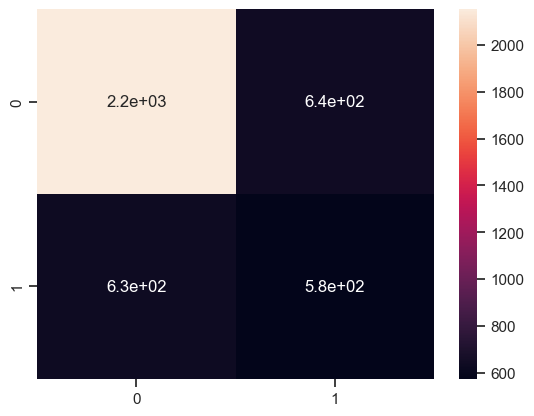

In [173]:
#Heatmap of Decision Tree
sns.heatmap(cm_dt, annot=True)

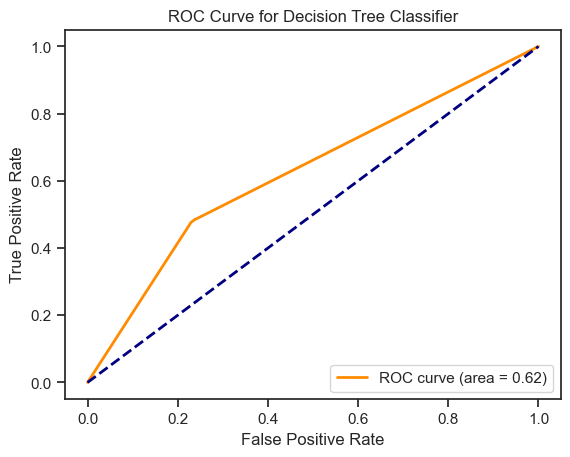

In [174]:
# Get predicted probabilities for the positive class (class 1)
roc = classi.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(Y_test, roc, pos_label=2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

# Decision Tree - Grid Search

In [175]:
# Define the hyperparameters and their possible values
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [176]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

In [177]:
# Create the GridSearchCV object
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy')

In [178]:
# Fit the grid search to the data
grid_search_dt.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [179]:
# Print the best hyperparameters
best_param_dt = grid_search_dt.best_params_
print("Best hyperparameter : ", best_param_dt)

Best hyperparameter :  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [180]:
#Creates a Decision Tree classifier (best_dt) with specific hyperparameters obtained from a grid search
best_dt = DecisionTreeClassifier(criterion=best_param_dt['criterion'], max_depth=best_param_dt['max_depth'], min_samples_split=best_param_dt['min_samples_split'], min_samples_leaf=best_param_dt['min_samples_leaf'])

In [181]:
#Fits the Decision Tree classifier (best_dt) to the training data using the previously determined best hyperparameters.
best_dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [182]:
#Making prediction on the test data
Y_pred_dt_gs = best_dt.predict(X_test)

In [183]:
#Accuracy of Decision Tree after grid search
DT_GS_acc = accuracy_score(Y_test, Y_pred_dt_gs)
print("Accuracy after Grid Search : {:.2f}%". format(DT_GS_acc * 100))

Accuracy after Grid Search : 74.55%


In [184]:
#F1 score of Decision Tree after grid search
DT_GS_f1 = f1_score(Y_test, Y_pred_dt_gs)
print("F1 score after Grid Search : {:.2f}%". format(DT_GS_f1 * 100))

F1 score after Grid Search : 84.37%


In [185]:
#Classification report of Decision Tree after grid search
print("Classification Report")
print(classification_report(Y_test, Y_pred_dt_gs))

Classification Report
              precision    recall  f1-score   support

           1       0.74      0.98      0.84      2793
           2       0.84      0.19      0.31      1207

    accuracy                           0.75      4000
   macro avg       0.79      0.59      0.58      4000
weighted avg       0.77      0.75      0.68      4000



In [186]:
#Confusion matrix of Decision Tree after grid search
cm_dt_gs = confusion_matrix(Y_test, Y_pred_dt_gs)
print('Confusion matrix : ')
print(cm_dt_gs)
print('True Positives(TP) = ', cm_dt_gs[0,0])
print('True Negatives(TN) = ', cm_dt_gs[1,1])
print('False Positives(FP) = ', cm_dt_gs[0,1])
print('False Negatives(FN) = ', cm_dt_gs[1,0])

Confusion matrix : 
[[2748   45]
 [ 973  234]]
True Positives(TP) =  2748
True Negatives(TN) =  234
False Positives(FP) =  45
False Negatives(FN) =  973


<Axes: >

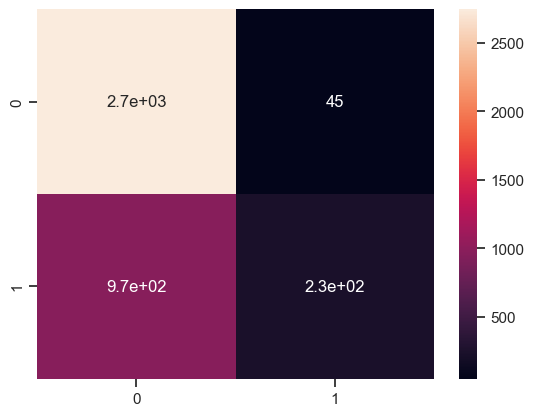

In [187]:
#Heatmap of Decision Tree after grid search
sns.heatmap(cm_dt_gs, annot=True)

# Decision Tree - Randomized Search

In [188]:
# Define the hyperparameters and their possible values
param_dist_dt_rs = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [189]:
# Create a Decision Tree Classifier
dt_classifier_rs = DecisionTreeClassifier()

In [190]:
# Create the RandomizedSearchCV object
randomized_search_dt = RandomizedSearchCV(
    dt_classifier_rs, param_distributions=param_dist_dt_rs, n_iter=10, cv=5, scoring='accuracy', random_state=42
)

In [191]:
# Fit the randomized search to the data
randomized_search_dt.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [192]:
# Print the best hyperparameters
best_param_dt_rs = randomized_search_dt.best_params_
print("Best hyperparameter : ", best_param_dt_rs)

Best hyperparameter :  {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'gini'}


In [193]:
#Creates a Decision Tree classifier (best_dt) with specific hyperparameters obtained from a randomized search
best_dt_rs = DecisionTreeClassifier(criterion=best_param_dt_rs['criterion'], max_depth=best_param_dt_rs['max_depth'], min_samples_split=best_param_dt_rs['min_samples_split'], min_samples_leaf=best_param_dt_rs['min_samples_leaf'])

In [194]:
#Fits the Decision Tree classifier (best_dt_rs) to the training data (X_train, Y_train) using the previously determined best hyperparameters.
best_dt_rs.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

In [195]:
#Making prediction on the test data
Y_pred_dt_rs = best_dt_rs.predict(X_test)

In [196]:
#Accuracy of Decision Tree after randomized search
DT_RS_acc = accuracy_score(Y_test, Y_pred_dt_rs)
print("Accuracy after Grid Search : {:.2f}%". format(DT_RS_acc * 100))

Accuracy after Grid Search : 74.52%


In [197]:
#F1 score of Decision Tree after randomized search
DT_RS_f1 = f1_score(Y_test, Y_pred_dt_rs)
print("Accuracy after Grid Search : {:.2f}%". format(DT_RS_f1 * 100))

Accuracy after Grid Search : 84.37%


In [198]:
#Classification report of Decision Tree after randomized search
print("Classification Report")
print(classification_report(Y_test, Y_pred_dt_rs))

Classification Report
              precision    recall  f1-score   support

           1       0.74      0.98      0.84      2793
           2       0.84      0.19      0.31      1207

    accuracy                           0.75      4000
   macro avg       0.79      0.59      0.58      4000
weighted avg       0.77      0.75      0.68      4000



In [199]:
#Confusion matrix of Decision Tree after randomized search
cm_dt_rs = confusion_matrix(Y_test, Y_pred_dt_rs)
print('Confusion matrix : ')
print(cm_dt_rs)
print('True Positives(TP) = ', cm_dt_rs[0,0])
print('True Negatives(TN) = ', cm_dt_rs[1,1])
print('False Positives(FP) = ', cm_dt_rs[0,1])
print('False Negatives(FN) = ', cm_dt_rs[1,0])

Confusion matrix : 
[[2750   43]
 [ 976  231]]
True Positives(TP) =  2750
True Negatives(TN) =  231
False Positives(FP) =  43
False Negatives(FN) =  976


<Axes: >

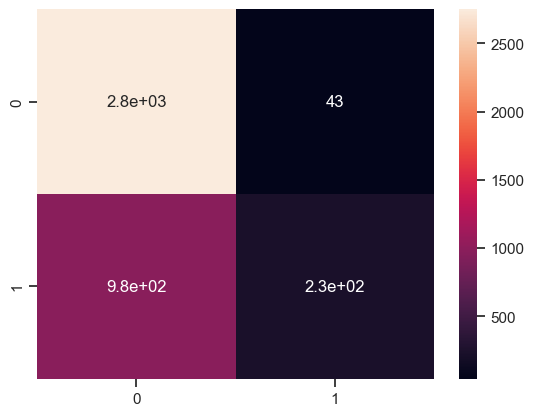

In [200]:
#Heatmap of Decision Tree after randomized search
sns.heatmap(cm_dt_rs, annot=True)

# Result of Predictive Modelling

In [201]:
# Create a dictionary to store accuracy values for each model
df1 = {
    "Algorithm": ["Logistic Regression", "k-NN", "SVM", "Decision Tree", ],
    "Accuracy": [LR_acc, KNN_acc, SVM_acc, DT_acc],
    "F1 Score": [LR_f1, KNN_f1, SVM_f1, DT_f1]
}

# Create a Pandas DataFrame from the dictionary
df2 = pd.DataFrame(df1)

# Display the DataFrame as a table
df2

,Algorithm,Accuracy,F1 Score
0,Logistic Regression,0.75575,0.844501
1,k-NN,0.73750,0.828823
2,SVM,0.75225,0.845951
3,Decision Tree,0.68175,0.771741


In [202]:
#Creating list to store accuracy and f1 scores for different algorithms respectively
acc_scores = [LR_acc, KNN_acc, SVM_acc, DT_acc]
f1_scores = [LR_f1, KNN_f1, SVM_f1, DT_f1]
algorithms = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree']

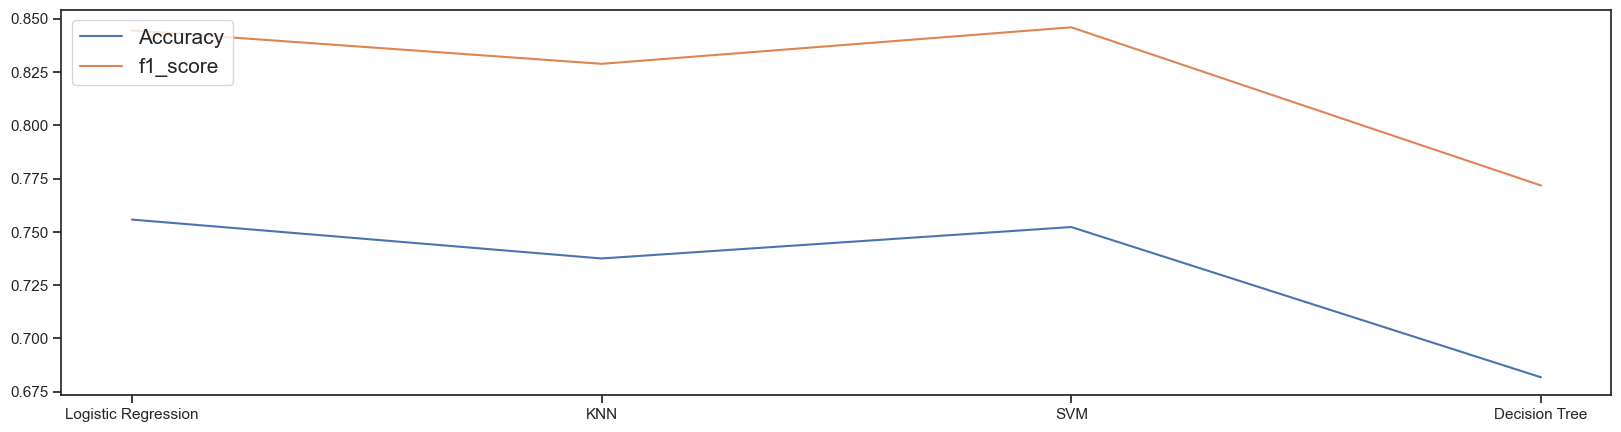

In [203]:
#line plots for accuracy and F1 scores across different algorithms 
plt.figure(figsize=(20,5))
plt.plot(algorithms, acc_scores)
plt.plot(algorithms,f1_scores)
plt.legend(['Accuracy','f1_score'],loc=2,prop={"size":15})
plt.show()

Conclusion : After performing different types of algorithm on the dataset we could see that each algorithm's model perform differently in order to classify the data and providing accuracy of doing the same. 
In classification models however the accuracies of all the models i.e. logistic regression, SVM, knn, decision tree are almost above 70% showing that their ability to classify the data is well, but if we want to choose one model out of these we would go for Logistic Regression.
From our readings we can see that Logistic Regression has shown the highest accuracy and a fairly good f1 score. 
Therefore we can conclude that Logistic Regression is what works best for this model.